In [1]:
from datasets import log_progress
import prep_dataset
import pandas as pd

In [2]:
subjects = range(3, 4)
time_start = [-1.0, -0.8, -0.5, -0.3]

for subject in log_progress(subjects):
    data = prep_dataset.Prep('Motor Execution', subject = subject, bands = {'wide': [2, 25]})
    data.create_training_testing_unfiltered_raw()
    event_id = dict(flex = 1, extend = 2, sup = 3, pro = 4, close = 5, hopen = 6, rest = 7)

    subject_array, time_array, band_array = [], [], []
    class_condition_array = []
    train_acc_array, val_acc_array, test_acc_array = [], [], []
    event1_array, event2_array = [], []

    for time in time_start:
        data.create_filtered_epochs(event_id, tmin=time, tmax=0.1)

        for i in list(data.added_event_id.keys()):
            print(i)
            data.OVR(i)

            temp_report = data.extract_metrics('Test', data.total_actual_train, data.total_predicted_train)
            train = temp_report['precision']['accuracy']
            temp_report = data.extract_metrics('Test', data.total_actual_val, data.total_predicted_val)
            val = temp_report['precision']['accuracy']
            temp_report = data.extract_metrics('Test', data.total_actual_test, data.total_predicted_test)
            test = temp_report['precision']['accuracy']

            subject_array.append(subject)
            time_array.append(time)
            band_array.append('wide')
            class_condition_array.append('OVR')
            event1_array.append(i)
            event2_array.append('Other')
            train_acc_array.append(train)
            val_acc_array.append(val)
            test_acc_array.append(test)

    standard_OVR = pd.DataFrame({'Subject': subject_array, 'Condition': class_condition_array, 'Band Condition': band_array, 'Start Time': time_array, 'Event1': event1_array, 'Event2': event2_array, 'Train': train_acc_array, 'Validation': val_acc_array, 'Test': test_acc_array})
    filename = 'subject' + str(subject) + '_OVR_wide.csv'
    standard_OVR.to_csv(filename, index=False)

on']
  raw = mne.io.read_raw_gdf(file_location, preload=True)
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.
Used Annotations descriptions: ['1536', '1537', '1538', '1539', '1540', '1541', '1542', '33536', '33554', '34304', '34305', '34306', '34307', '34308', '34309', '34310', '768', '785', '786']
{'1536': 1, '1537': 2, '1538': 3, '1539': 4, '1540': 5, '1541': 6, '1542': 7, '33536': 8, '33554': 9, '34304': 10, '34305': 11, '34306': 12, '34307': 13, '34308': 14, '34309': 15, '34310': 16, '768': 17, '785': 18, '786': 19}
The Motor Execution dataset has been loaded.
c:\Users\ergo\Datasets\INTENT\datasets.py:303: DeprecationWarning: Passing montage to create_info is deprecated and will be removed in 0.21, use raw.set_montage (or epochs.set_montage, etc.) instead
  info = create_info(channel_names, sfreq=512.0, ch_types=channel_type, montage=montage)
126 events found
Event IDs: [ 1  2  3  4  5  6  7 10 11 12 13 14 15 16 19]
6 matchi

,precision,recall,f1-score,support
0,0.951351,0.926316,0.938667,190.000000
1,0.928205,0.952632,0.940260,190.000000
accuracy,0.939474,0.939474,0.939474,0.939474
macro avg,0.939778,0.939474,0.939463,380.000000
weighted avg,0.939778,0.939474,0.939463,380.000000


,precision,recall,f1-score,support
0,0.951351,0.926316,0.938667,190.000000
1,0.928205,0.952632,0.940260,190.000000
accuracy,0.939474,0.939474,0.939474,0.939474
macro avg,0.939778,0.939474,0.939463,380.000000
weighted avg,0.939778,0.939474,0.939463,380.000000


Test  classification report


,precision,recall,f1-score,support
0,0.478261,0.44,0.458333,50.00
1,0.481481,0.52,0.500000,50.00
accuracy,0.480000,0.48,0.480000,0.48
macro avg,0.479871,0.48,0.479167,100.00
weighted avg,0.479871,0.48,0.479167,100.00


,precision,recall,f1-score,support
0,0.478261,0.44,0.458333,50.00
1,0.481481,0.52,0.500000,50.00
accuracy,0.480000,0.48,0.480000,0.48
macro avg,0.479871,0.48,0.479167,100.00
weighted avg,0.479871,0.48,0.479167,100.00


Test  classification report


,precision,recall,f1-score,support
0,0.642857,0.750000,0.692308,12.000000
1,0.700000,0.583333,0.636364,12.000000
accuracy,0.666667,0.666667,0.666667,0.666667
macro avg,0.671429,0.666667,0.664336,24.000000
weighted avg,0.671429,0.666667,0.664336,24.000000


,precision,recall,f1-score,support
0,0.642857,0.750000,0.692308,12.000000
1,0.700000,0.583333,0.636364,12.000000
accuracy,0.666667,0.666667,0.666667,0.666667
macro avg,0.671429,0.666667,0.664336,24.000000
weighted avg,0.671429,0.666667,0.664336,24.000000


extend
wide
['flex', 'sup', 'pro', 'close', 'hopen', 'rest']
48
48 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 bad epochs dropped
12
12 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 bad epochs dropped
Computing rank from data with rank=None
    Using tolerance 1.1e+02 (2.2e-16 eps * 61 dim * 8e+15  max singular value)
c:\Users\ergo\Datasets\INTENT\prep_dataset.py:547: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  event2_epochs_train = mne.concatenate_epochs([sev1_train, sev2_train, sev3_train, sev4_train, sev5_train, sev6_train])
    Estimated rank (mag): 61
    MAG: rank 61 computed from 61 data channels with 0 projectors
Reducing data rank from 61 -> 61
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.2e+02 (2.2e-16 eps * 61 dim * 8.8e+15  max singular value)
    Estimated rank (mag): 61
    MAG: 

,precision,recall,f1-score,support
0,0.942105,0.942105,0.942105,190.000000
2,0.942105,0.942105,0.942105,190.000000
accuracy,0.942105,0.942105,0.942105,0.942105
macro avg,0.942105,0.942105,0.942105,380.000000
weighted avg,0.942105,0.942105,0.942105,380.000000


,precision,recall,f1-score,support
0,0.942105,0.942105,0.942105,190.000000
2,0.942105,0.942105,0.942105,190.000000
accuracy,0.942105,0.942105,0.942105,0.942105
macro avg,0.942105,0.942105,0.942105,380.000000
weighted avg,0.942105,0.942105,0.942105,380.000000


Test  classification report


,precision,recall,f1-score,support
0,0.437500,0.42,0.428571,50.00
2,0.442308,0.46,0.450980,50.00
accuracy,0.440000,0.44,0.440000,0.44
macro avg,0.439904,0.44,0.439776,100.00
weighted avg,0.439904,0.44,0.439776,100.00


,precision,recall,f1-score,support
0,0.437500,0.42,0.428571,50.00
2,0.442308,0.46,0.450980,50.00
accuracy,0.440000,0.44,0.440000,0.44
macro avg,0.439904,0.44,0.439776,100.00
weighted avg,0.439904,0.44,0.439776,100.00


Test  classification report


,precision,recall,f1-score,support
0,0.555556,0.416667,0.476190,12.000000
2,0.533333,0.666667,0.592593,12.000000
accuracy,0.541667,0.541667,0.541667,0.541667
macro avg,0.544444,0.541667,0.534392,24.000000
weighted avg,0.544444,0.541667,0.534392,24.000000


,precision,recall,f1-score,support
0,0.555556,0.416667,0.476190,12.000000
2,0.533333,0.666667,0.592593,12.000000
accuracy,0.541667,0.541667,0.541667,0.541667
macro avg,0.544444,0.541667,0.534392,24.000000
weighted avg,0.544444,0.541667,0.534392,24.000000


sup
wide
['flex', 'extend', 'pro', 'close', 'hopen', 'rest']
48
48 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 bad epochs dropped
12
12 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 bad epochs dropped
Computing rank from data with rank=None
    Using tolerance 1e+02 (2.2e-16 eps * 61 dim * 7.7e+15  max singular value)
    Estimated rank (mag): 61
    MAG: rank 61 computed from 61 data channels with 0 projectors
Reducing data rank from 61 -> 61
c:\Users\ergo\Datasets\INTENT\prep_dataset.py:547: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  event2_epochs_train = mne.concatenate_epochs([sev1_train, sev2_train, sev3_train, sev4_train, sev5_train, sev6_train])
c:\Users\ergo\Datasets\INTENT\prep_dataset.py:573: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  event2_epochs_test = mne.concatenate_epochs([sev1_test, s

,precision,recall,f1-score,support
0,0.926702,0.931579,0.929134,190.000000
3,0.931217,0.926316,0.928760,190.000000
accuracy,0.928947,0.928947,0.928947,0.928947
macro avg,0.928959,0.928947,0.928947,380.000000
weighted avg,0.928959,0.928947,0.928947,380.000000


,precision,recall,f1-score,support
0,0.926702,0.931579,0.929134,190.000000
3,0.931217,0.926316,0.928760,190.000000
accuracy,0.928947,0.928947,0.928947,0.928947
macro avg,0.928959,0.928947,0.928947,380.000000
weighted avg,0.928959,0.928947,0.928947,380.000000


Test  classification report


,precision,recall,f1-score,support
0,0.574468,0.54,0.556701,50.00
3,0.566038,0.60,0.582524,50.00
accuracy,0.570000,0.57,0.570000,0.57
macro avg,0.570253,0.57,0.569613,100.00
weighted avg,0.570253,0.57,0.569613,100.00


,precision,recall,f1-score,support
0,0.574468,0.54,0.556701,50.00
3,0.566038,0.60,0.582524,50.00
accuracy,0.570000,0.57,0.570000,0.57
macro avg,0.570253,0.57,0.569613,100.00
weighted avg,0.570253,0.57,0.569613,100.00


Test  classification report


,precision,recall,f1-score,support
0,0.428571,0.500000,0.461538,12.000000
3,0.400000,0.333333,0.363636,12.000000
accuracy,0.416667,0.416667,0.416667,0.416667
macro avg,0.414286,0.416667,0.412587,24.000000
weighted avg,0.414286,0.416667,0.412587,24.000000


,precision,recall,f1-score,support
0,0.428571,0.500000,0.461538,12.000000
3,0.400000,0.333333,0.363636,12.000000
accuracy,0.416667,0.416667,0.416667,0.416667
macro avg,0.414286,0.416667,0.412587,24.000000
weighted avg,0.414286,0.416667,0.412587,24.000000


pro
wide
['flex', 'extend', 'sup', 'close', 'hopen', 'rest']
48
48 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 bad epochs dropped
12
12 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 bad epochs dropped
Computing rank from data with rank=None
c:\Users\ergo\Datasets\INTENT\prep_dataset.py:547: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  event2_epochs_train = mne.concatenate_epochs([sev1_train, sev2_train, sev3_train, sev4_train, sev5_train, sev6_train])
c:\Users\ergo\Datasets\INTENT\prep_dataset.py:573: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  event2_epochs_test = mne.concatenate_epochs([sev1_test, sev2_test, sev3_test, sev4_test, sev5_test, sev6_test])
    Using tolerance 1.2e+02 (2.2e-16 eps * 61 dim * 8.7e+15  max singular value)
    Estimated rank (mag): 61
    MAG: rank 61 computed from 61 data cha

,precision,recall,f1-score,support
0,0.963158,0.963158,0.963158,190.000000
4,0.963158,0.963158,0.963158,190.000000
accuracy,0.963158,0.963158,0.963158,0.963158
macro avg,0.963158,0.963158,0.963158,380.000000
weighted avg,0.963158,0.963158,0.963158,380.000000


,precision,recall,f1-score,support
0,0.963158,0.963158,0.963158,190.000000
4,0.963158,0.963158,0.963158,190.000000
accuracy,0.963158,0.963158,0.963158,0.963158
macro avg,0.963158,0.963158,0.963158,380.000000
weighted avg,0.963158,0.963158,0.963158,380.000000


Test  classification report


,precision,recall,f1-score,support
0,0.452381,0.38,0.413043,50.00
4,0.465517,0.54,0.500000,50.00
accuracy,0.460000,0.46,0.460000,0.46
macro avg,0.458949,0.46,0.456522,100.00
weighted avg,0.458949,0.46,0.456522,100.00


,precision,recall,f1-score,support
0,0.452381,0.38,0.413043,50.00
4,0.465517,0.54,0.500000,50.00
accuracy,0.460000,0.46,0.460000,0.46
macro avg,0.458949,0.46,0.456522,100.00
weighted avg,0.458949,0.46,0.456522,100.00


Test  classification report


,precision,recall,f1-score,support
0,0.636364,0.583333,0.608696,12.000
4,0.615385,0.666667,0.640000,12.000
accuracy,0.625000,0.625000,0.625000,0.625
macro avg,0.625874,0.625000,0.624348,24.000
weighted avg,0.625874,0.625000,0.624348,24.000


,precision,recall,f1-score,support
0,0.636364,0.583333,0.608696,12.000
4,0.615385,0.666667,0.640000,12.000
accuracy,0.625000,0.625000,0.625000,0.625
macro avg,0.625874,0.625000,0.624348,24.000
weighted avg,0.625874,0.625000,0.624348,24.000


close
wide
['flex', 'extend', 'sup', 'pro', 'hopen', 'rest']
48
48 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 bad epochs dropped
12
12 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 bad epochs dropped
Computing rank from data with rank=None
    Using tolerance 1.1e+02 (2.2e-16 eps * 61 dim * 8e+15  max singular value)
    Estimated rank (mag): 61
    MAG: rank 61 computed from 61 data channels with 0 projectors
c:\Users\ergo\Datasets\INTENT\prep_dataset.py:547: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  event2_epochs_train = mne.concatenate_epochs([sev1_train, sev2_train, sev3_train, sev4_train, sev5_train, sev6_train])
c:\Users\ergo\Datasets\INTENT\prep_dataset.py:573: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  event2_epochs_test = mne.concatenate_epochs([sev1_test, sev2_test, sev3_test, sev4_test, s

,precision,recall,f1-score,support
0,0.916667,0.984211,0.949239,190.000000
5,0.982955,0.910526,0.945355,190.000000
accuracy,0.947368,0.947368,0.947368,0.947368
macro avg,0.949811,0.947368,0.947297,380.000000
weighted avg,0.949811,0.947368,0.947297,380.000000


,precision,recall,f1-score,support
0,0.916667,0.984211,0.949239,190.000000
5,0.982955,0.910526,0.945355,190.000000
accuracy,0.947368,0.947368,0.947368,0.947368
macro avg,0.949811,0.947368,0.947297,380.000000
weighted avg,0.949811,0.947368,0.947297,380.000000


Test  classification report


,precision,recall,f1-score,support
0,0.475410,0.58,0.522523,50.00
5,0.461538,0.36,0.404494,50.00
accuracy,0.470000,0.47,0.470000,0.47
macro avg,0.468474,0.47,0.463508,100.00
weighted avg,0.468474,0.47,0.463508,100.00


,precision,recall,f1-score,support
0,0.475410,0.58,0.522523,50.00
5,0.461538,0.36,0.404494,50.00
accuracy,0.470000,0.47,0.470000,0.47
macro avg,0.468474,0.47,0.463508,100.00
weighted avg,0.468474,0.47,0.463508,100.00


Test  classification report


,precision,recall,f1-score,support
0,0.600000,0.500000,0.545455,12.000000
5,0.571429,0.666667,0.615385,12.000000
accuracy,0.583333,0.583333,0.583333,0.583333
macro avg,0.585714,0.583333,0.580420,24.000000
weighted avg,0.585714,0.583333,0.580420,24.000000


,precision,recall,f1-score,support
0,0.600000,0.500000,0.545455,12.000000
5,0.571429,0.666667,0.615385,12.000000
accuracy,0.583333,0.583333,0.583333,0.583333
macro avg,0.585714,0.583333,0.580420,24.000000
weighted avg,0.585714,0.583333,0.580420,24.000000


hopen
wide
['flex', 'extend', 'sup', 'pro', 'close', 'rest']
48
48 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 bad epochs dropped
12
12 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 bad epochs dropped
Computing rank from data with rank=None
    Using tolerance 1.1e+02 (2.2e-16 eps * 61 dim * 8.1e+15  max singular value)
c:\Users\ergo\Datasets\INTENT\prep_dataset.py:547: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  event2_epochs_train = mne.concatenate_epochs([sev1_train, sev2_train, sev3_train, sev4_train, sev5_train, sev6_train])
c:\Users\ergo\Datasets\INTENT\prep_dataset.py:573: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  event2_epochs_test = mne.concatenate_epochs([sev1_test, sev2_test, sev3_test, sev4_test, sev5_test, sev6_test])
    Estimated rank (mag): 61
    MAG: rank 61 computed from 61 data cha

,precision,recall,f1-score,support
0,0.909091,0.947368,0.927835,190.000000
6,0.945055,0.905263,0.924731,190.000000
accuracy,0.926316,0.926316,0.926316,0.926316
macro avg,0.927073,0.926316,0.926283,380.000000
weighted avg,0.927073,0.926316,0.926283,380.000000


,precision,recall,f1-score,support
0,0.909091,0.947368,0.927835,190.000000
6,0.945055,0.905263,0.924731,190.000000
accuracy,0.926316,0.926316,0.926316,0.926316
macro avg,0.927073,0.926316,0.926283,380.000000
weighted avg,0.927073,0.926316,0.926283,380.000000


Test  classification report


,precision,recall,f1-score,support
0,0.333333,0.36,0.346154,50.00
6,0.304348,0.28,0.291667,50.00
accuracy,0.320000,0.32,0.320000,0.32
macro avg,0.318841,0.32,0.318910,100.00
weighted avg,0.318841,0.32,0.318910,100.00


,precision,recall,f1-score,support
0,0.333333,0.36,0.346154,50.00
6,0.304348,0.28,0.291667,50.00
accuracy,0.320000,0.32,0.320000,0.32
macro avg,0.318841,0.32,0.318910,100.00
weighted avg,0.318841,0.32,0.318910,100.00


Test  classification report


,precision,recall,f1-score,support
0,0.666667,0.500,0.571429,12.000
6,0.600000,0.750,0.666667,12.000
accuracy,0.625000,0.625,0.625000,0.625
macro avg,0.633333,0.625,0.619048,24.000
weighted avg,0.633333,0.625,0.619048,24.000


,precision,recall,f1-score,support
0,0.666667,0.500,0.571429,12.000
6,0.600000,0.750,0.666667,12.000
accuracy,0.625000,0.625,0.625000,0.625
macro avg,0.633333,0.625,0.619048,24.000
weighted avg,0.633333,0.625,0.619048,24.000


rest
wide
['flex', 'extend', 'sup', 'pro', 'close', 'hopen']
48
48 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 bad epochs dropped
12
12 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 bad epochs dropped
Computing rank from data with rank=None
    Using tolerance 1.2e+02 (2.2e-16 eps * 61 dim * 8.7e+15  max singular value)
    Estimated rank (mag): 61
    MAG: rank 61 computed from 61 data channels with 0 projectors
c:\Users\ergo\Datasets\INTENT\prep_dataset.py:547: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  event2_epochs_train = mne.concatenate_epochs([sev1_train, sev2_train, sev3_train, sev4_train, sev5_train, sev6_train])
c:\Users\ergo\Datasets\INTENT\prep_dataset.py:573: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  event2_epochs_test = mne.concatenate_epochs([sev1_test, sev2_test, sev3_test, sev4_test,

,precision,recall,f1-score,support
0,0.963918,0.984211,0.973958,190.000000
7,0.983871,0.963158,0.973404,190.000000
accuracy,0.973684,0.973684,0.973684,0.973684
macro avg,0.973894,0.973684,0.973681,380.000000
weighted avg,0.973894,0.973684,0.973681,380.000000


,precision,recall,f1-score,support
0,0.963918,0.984211,0.973958,190.000000
7,0.983871,0.963158,0.973404,190.000000
accuracy,0.973684,0.973684,0.973684,0.973684
macro avg,0.973894,0.973684,0.973681,380.000000
weighted avg,0.973894,0.973684,0.973681,380.000000


Test  classification report


,precision,recall,f1-score,support
0,0.507937,0.64,0.566372,50.00
7,0.513514,0.38,0.436782,50.00
accuracy,0.510000,0.51,0.510000,0.51
macro avg,0.510725,0.51,0.501577,100.00
weighted avg,0.510725,0.51,0.501577,100.00


,precision,recall,f1-score,support
0,0.507937,0.64,0.566372,50.00
7,0.513514,0.38,0.436782,50.00
accuracy,0.510000,0.51,0.510000,0.51
macro avg,0.510725,0.51,0.501577,100.00
weighted avg,0.510725,0.51,0.501577,100.00


Test  classification report


,precision,recall,f1-score,support
0,0.714286,0.833333,0.769231,12.00
7,0.800000,0.666667,0.727273,12.00
accuracy,0.750000,0.750000,0.750000,0.75
macro avg,0.757143,0.750000,0.748252,24.00
weighted avg,0.757143,0.750000,0.748252,24.00


,precision,recall,f1-score,support
0,0.714286,0.833333,0.769231,12.00
7,0.800000,0.666667,0.727273,12.00
accuracy,0.750000,0.750000,0.750000,0.75
macro avg,0.757143,0.750000,0.748252,24.00
weighted avg,0.757143,0.750000,0.748252,24.00


1008 events found
Event IDs: [ 1  2  3  4  5  6  7 10 11 12 13 14 15 16 19]
336 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 336 events and 462 original time points ...
0 bad epochs dropped
252 events found
Event IDs: [ 1  2  3  4  5  6  7 10 11 12 13 14 15 16 19]
84 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 84 events and 462 original time points ...
0 bad epochs dropped
flex
wide
['extend', 'sup', 'pro', 'close', 'hopen', 'rest']
48
48 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 bad epochs dropped
12
12 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 bad epochs dropped
Computing rank from data with rank=None
    Using tolerance 1.1e+02 (2.2e-16 eps * 61 dim * 8.2e+15  max singular value)
    Estimated rank (mag): 61
    MAG: rank 61

,precision,recall,f1-score,support
0,0.962162,0.936842,0.949333,190.00
1,0.938462,0.963158,0.950649,190.00
accuracy,0.950000,0.950000,0.950000,0.95
macro avg,0.950312,0.950000,0.949991,380.00
weighted avg,0.950312,0.950000,0.949991,380.00


,precision,recall,f1-score,support
0,0.962162,0.936842,0.949333,190.00
1,0.938462,0.963158,0.950649,190.00
accuracy,0.950000,0.950000,0.950000,0.95
macro avg,0.950312,0.950000,0.949991,380.00
weighted avg,0.950312,0.950000,0.949991,380.00


Test  classification report


,precision,recall,f1-score,support
0,0.561404,0.64,0.598131,50.00
1,0.581395,0.50,0.537634,50.00
accuracy,0.570000,0.57,0.570000,0.57
macro avg,0.571399,0.57,0.567883,100.00
weighted avg,0.571399,0.57,0.567883,100.00


,precision,recall,f1-score,support
0,0.561404,0.64,0.598131,50.00
1,0.581395,0.50,0.537634,50.00
accuracy,0.570000,0.57,0.570000,0.57
macro avg,0.571399,0.57,0.567883,100.00
weighted avg,0.571399,0.57,0.567883,100.00


Test  classification report


,precision,recall,f1-score,support
0,0.555556,0.416667,0.476190,12.000000
1,0.533333,0.666667,0.592593,12.000000
accuracy,0.541667,0.541667,0.541667,0.541667
macro avg,0.544444,0.541667,0.534392,24.000000
weighted avg,0.544444,0.541667,0.534392,24.000000


,precision,recall,f1-score,support
0,0.555556,0.416667,0.476190,12.000000
1,0.533333,0.666667,0.592593,12.000000
accuracy,0.541667,0.541667,0.541667,0.541667
macro avg,0.544444,0.541667,0.534392,24.000000
weighted avg,0.544444,0.541667,0.534392,24.000000


extend
wide
['flex', 'sup', 'pro', 'close', 'hopen', 'rest']
48
48 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 bad epochs dropped
12
12 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 bad epochs dropped
Computing rank from data with rank=None
    Using tolerance 1e+02 (2.2e-16 eps * 61 dim * 7.6e+15  max singular value)
    Estimated rank (mag): 61
    MAG: rank 61 computed from 61 data channels with 0 projectors
Reducing data rank from 61 -> 61
c:\Users\ergo\Datasets\INTENT\prep_dataset.py:547: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  event2_epochs_train = mne.concatenate_epochs([sev1_train, sev2_train, sev3_train, sev4_train, sev5_train, sev6_train])
c:\Users\ergo\Datasets\INTENT\prep_dataset.py:573: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  event2_epochs_test = mne.concatenate_epochs([sev1_test, s

,precision,recall,f1-score,support
0,0.943005,0.957895,0.950392,190.00
2,0.957219,0.942105,0.949602,190.00
accuracy,0.950000,0.950000,0.950000,0.95
macro avg,0.950112,0.950000,0.949997,380.00
weighted avg,0.950112,0.950000,0.949997,380.00


,precision,recall,f1-score,support
0,0.943005,0.957895,0.950392,190.00
2,0.957219,0.942105,0.949602,190.00
accuracy,0.950000,0.950000,0.950000,0.95
macro avg,0.950112,0.950000,0.949997,380.00
weighted avg,0.950112,0.950000,0.949997,380.00


Test  classification report


,precision,recall,f1-score,support
0,0.418605,0.36,0.387097,50.00
2,0.438596,0.50,0.467290,50.00
accuracy,0.430000,0.43,0.430000,0.43
macro avg,0.428601,0.43,0.427193,100.00
weighted avg,0.428601,0.43,0.427193,100.00


,precision,recall,f1-score,support
0,0.418605,0.36,0.387097,50.00
2,0.438596,0.50,0.467290,50.00
accuracy,0.430000,0.43,0.430000,0.43
macro avg,0.428601,0.43,0.427193,100.00
weighted avg,0.428601,0.43,0.427193,100.00


Test  classification report


,precision,recall,f1-score,support
0,0.666667,0.666667,0.666667,12.000000
2,0.666667,0.666667,0.666667,12.000000
accuracy,0.666667,0.666667,0.666667,0.666667
macro avg,0.666667,0.666667,0.666667,24.000000
weighted avg,0.666667,0.666667,0.666667,24.000000


,precision,recall,f1-score,support
0,0.666667,0.666667,0.666667,12.000000
2,0.666667,0.666667,0.666667,12.000000
accuracy,0.666667,0.666667,0.666667,0.666667
macro avg,0.666667,0.666667,0.666667,24.000000
weighted avg,0.666667,0.666667,0.666667,24.000000


sup
wide
['flex', 'extend', 'pro', 'close', 'hopen', 'rest']
48
48 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 bad epochs dropped
12
12 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 bad epochs dropped
Computing rank from data with rank=None
    Using tolerance 1.1e+02 (2.2e-16 eps * 61 dim * 8.2e+15  max singular value)
    Estimated rank (mag): 61
    MAG: rank 61 computed from 61 data channels with 0 projectors
Reducing data rank from 61 -> 61
Estimating covariance using EMPIRICAL
Done.
c:\Users\ergo\Datasets\INTENT\prep_dataset.py:547: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  event2_epochs_train = mne.concatenate_epochs([sev1_train, sev2_train, sev3_train, sev4_train, sev5_train, sev6_train])
c:\Users\ergo\Datasets\INTENT\prep_dataset.py:573: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  event2_epoc

,precision,recall,f1-score,support
0,0.904255,0.894737,0.899471,190.0
3,0.895833,0.905263,0.900524,190.0
accuracy,0.900000,0.900000,0.900000,0.9
macro avg,0.900044,0.900000,0.899997,380.0
weighted avg,0.900044,0.900000,0.899997,380.0


,precision,recall,f1-score,support
0,0.904255,0.894737,0.899471,190.0
3,0.895833,0.905263,0.900524,190.0
accuracy,0.900000,0.900000,0.900000,0.9
macro avg,0.900044,0.900000,0.899997,380.0
weighted avg,0.900044,0.900000,0.899997,380.0


Test  classification report


,precision,recall,f1-score,support
0,0.5,0.46,0.479167,50.0
3,0.5,0.54,0.519231,50.0
accuracy,0.5,0.50,0.500000,0.5
macro avg,0.5,0.50,0.499199,100.0
weighted avg,0.5,0.50,0.499199,100.0


,precision,recall,f1-score,support
0,0.5,0.46,0.479167,50.0
3,0.5,0.54,0.519231,50.0
accuracy,0.5,0.50,0.500000,0.5
macro avg,0.5,0.50,0.499199,100.0
weighted avg,0.5,0.50,0.499199,100.0


Test  classification report


,precision,recall,f1-score,support
0,0.444444,0.333333,0.380952,12.000000
3,0.466667,0.583333,0.518519,12.000000
accuracy,0.458333,0.458333,0.458333,0.458333
macro avg,0.455556,0.458333,0.449735,24.000000
weighted avg,0.455556,0.458333,0.449735,24.000000


,precision,recall,f1-score,support
0,0.444444,0.333333,0.380952,12.000000
3,0.466667,0.583333,0.518519,12.000000
accuracy,0.458333,0.458333,0.458333,0.458333
macro avg,0.455556,0.458333,0.449735,24.000000
weighted avg,0.455556,0.458333,0.449735,24.000000


pro
wide
['flex', 'extend', 'sup', 'close', 'hopen', 'rest']
48
48 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 bad epochs dropped
12
12 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 bad epochs dropped
Computing rank from data with rank=None
    Using tolerance 1.1e+02 (2.2e-16 eps * 61 dim * 8.1e+15  max singular value)
    Estimated rank (mag): 61
    MAG: rank 61 computed from 61 data channels with 0 projectors
Reducing data rank from 61 -> 61
c:\Users\ergo\Datasets\INTENT\prep_dataset.py:547: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  event2_epochs_train = mne.concatenate_epochs([sev1_train, sev2_train, sev3_train, sev4_train, sev5_train, sev6_train])
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1e+02 (2.2e-16 eps * 61 dim * 7.7e+15  max singular value)
    Estimated rank (mag): 61
    MAG: 

,precision,recall,f1-score,support
0,0.962162,0.936842,0.949333,190.00
4,0.938462,0.963158,0.950649,190.00
accuracy,0.950000,0.950000,0.950000,0.95
macro avg,0.950312,0.950000,0.949991,380.00
weighted avg,0.950312,0.950000,0.949991,380.00


,precision,recall,f1-score,support
0,0.962162,0.936842,0.949333,190.00
4,0.938462,0.963158,0.950649,190.00
accuracy,0.950000,0.950000,0.950000,0.95
macro avg,0.950312,0.950000,0.949991,380.00
weighted avg,0.950312,0.950000,0.949991,380.00


Test  classification report


,precision,recall,f1-score,support
0,0.54902,0.56,0.554455,50.00
4,0.55102,0.54,0.545455,50.00
accuracy,0.55000,0.55,0.550000,0.55
macro avg,0.55002,0.55,0.549955,100.00
weighted avg,0.55002,0.55,0.549955,100.00


,precision,recall,f1-score,support
0,0.54902,0.56,0.554455,50.00
4,0.55102,0.54,0.545455,50.00
accuracy,0.55000,0.55,0.550000,0.55
macro avg,0.55002,0.55,0.549955,100.00
weighted avg,0.55002,0.55,0.549955,100.00


Test  classification report


,precision,recall,f1-score,support
0,0.538462,0.583333,0.560000,12.000000
4,0.545455,0.500000,0.521739,12.000000
accuracy,0.541667,0.541667,0.541667,0.541667
macro avg,0.541958,0.541667,0.540870,24.000000
weighted avg,0.541958,0.541667,0.540870,24.000000


,precision,recall,f1-score,support
0,0.538462,0.583333,0.560000,12.000000
4,0.545455,0.500000,0.521739,12.000000
accuracy,0.541667,0.541667,0.541667,0.541667
macro avg,0.541958,0.541667,0.540870,24.000000
weighted avg,0.541958,0.541667,0.540870,24.000000


close
wide
['flex', 'extend', 'sup', 'pro', 'hopen', 'rest']
48
48 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 bad epochs dropped
12
12 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 bad epochs dropped
Computing rank from data with rank=None
    Using tolerance 1e+02 (2.2e-16 eps * 61 dim * 7.5e+15  max singular value)
    Estimated rank (mag): 61
    MAG: rank 61 computed from 61 data channels with 0 projectors
Reducing data rank from 61 -> 61
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
c:\Users\ergo\Datasets\INTENT\prep_dataset.py:547: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  event2_epochs_train = mne.concatenate_epochs([sev1_train, sev2_train, sev3_train, sev4_train, sev5_train, sev6_train])
    Using tolerance 96 (2.2e-16 eps * 61 dim * 7.1e+15  max singular value)
    Estimated rank (mag): 61
    MAG: rank 

,precision,recall,f1-score,support
0,0.968750,0.978947,0.973822,190.000000
5,0.978723,0.968421,0.973545,190.000000
accuracy,0.973684,0.973684,0.973684,0.973684
macro avg,0.973737,0.973684,0.973683,380.000000
weighted avg,0.973737,0.973684,0.973683,380.000000


,precision,recall,f1-score,support
0,0.968750,0.978947,0.973822,190.000000
5,0.978723,0.968421,0.973545,190.000000
accuracy,0.973684,0.973684,0.973684,0.973684
macro avg,0.973737,0.973684,0.973683,380.000000
weighted avg,0.973737,0.973684,0.973683,380.000000


Test  classification report


,precision,recall,f1-score,support
0,0.604167,0.58,0.591837,50.0
5,0.596154,0.62,0.607843,50.0
accuracy,0.600000,0.60,0.600000,0.6
macro avg,0.600160,0.60,0.599840,100.0
weighted avg,0.600160,0.60,0.599840,100.0


,precision,recall,f1-score,support
0,0.604167,0.58,0.591837,50.0
5,0.596154,0.62,0.607843,50.0
accuracy,0.600000,0.60,0.600000,0.6
macro avg,0.600160,0.60,0.599840,100.0
weighted avg,0.600160,0.60,0.599840,100.0


Test  classification report


,precision,recall,f1-score,support
0,0.428571,0.250000,0.315789,12.000000
5,0.470588,0.666667,0.551724,12.000000
accuracy,0.458333,0.458333,0.458333,0.458333
macro avg,0.449580,0.458333,0.433757,24.000000
weighted avg,0.449580,0.458333,0.433757,24.000000


,precision,recall,f1-score,support
0,0.428571,0.250000,0.315789,12.000000
5,0.470588,0.666667,0.551724,12.000000
accuracy,0.458333,0.458333,0.458333,0.458333
macro avg,0.449580,0.458333,0.433757,24.000000
weighted avg,0.449580,0.458333,0.433757,24.000000


hopen
wide
['flex', 'extend', 'sup', 'pro', 'close', 'rest']
48
48 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 bad epochs dropped
12
12 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 bad epochs dropped
Computing rank from data with rank=None
    Using tolerance 1.1e+02 (2.2e-16 eps * 61 dim * 8e+15  max singular value)
    Estimated rank (mag): 61
    MAG: rank 61 computed from 61 data channels with 0 projectors
Reducing data rank from 61 -> 61
Estimating covariance using EMPIRICAL
Done.
c:\Users\ergo\Datasets\INTENT\prep_dataset.py:547: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  event2_epochs_train = mne.concatenate_epochs([sev1_train, sev2_train, sev3_train, sev4_train, sev5_train, sev6_train])
Computing rank from data with rank=None
    Using tolerance 1.1e+02 (2.2e-16 eps * 61 dim * 7.9e+15  max singular value)
    Estimated rank (mag): 61
    MAG: 

,precision,recall,f1-score,support
0,0.978836,0.973684,0.976253,190.000000
6,0.973822,0.978947,0.976378,190.000000
accuracy,0.976316,0.976316,0.976316,0.976316
macro avg,0.976329,0.976316,0.976316,380.000000
weighted avg,0.976329,0.976316,0.976316,380.000000


,precision,recall,f1-score,support
0,0.978836,0.973684,0.976253,190.000000
6,0.973822,0.978947,0.976378,190.000000
accuracy,0.976316,0.976316,0.976316,0.976316
macro avg,0.976329,0.976316,0.976316,380.000000
weighted avg,0.976329,0.976316,0.976316,380.000000


Test  classification report


,precision,recall,f1-score,support
0,0.446809,0.42,0.432990,50.00
6,0.452830,0.48,0.466019,50.00
accuracy,0.450000,0.45,0.450000,0.45
macro avg,0.449819,0.45,0.449505,100.00
weighted avg,0.449819,0.45,0.449505,100.00


,precision,recall,f1-score,support
0,0.446809,0.42,0.432990,50.00
6,0.452830,0.48,0.466019,50.00
accuracy,0.450000,0.45,0.450000,0.45
macro avg,0.449819,0.45,0.449505,100.00
weighted avg,0.449819,0.45,0.449505,100.00


Test  classification report


,precision,recall,f1-score,support
0,0.12500,0.083333,0.100000,12.00
6,0.31250,0.416667,0.357143,12.00
accuracy,0.25000,0.250000,0.250000,0.25
macro avg,0.21875,0.250000,0.228571,24.00
weighted avg,0.21875,0.250000,0.228571,24.00


,precision,recall,f1-score,support
0,0.12500,0.083333,0.100000,12.00
6,0.31250,0.416667,0.357143,12.00
accuracy,0.25000,0.250000,0.250000,0.25
macro avg,0.21875,0.250000,0.228571,24.00
weighted avg,0.21875,0.250000,0.228571,24.00


rest
wide
['flex', 'extend', 'sup', 'pro', 'close', 'hopen']
48
48 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 bad epochs dropped
12
12 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 bad epochs dropped
Computing rank from data with rank=None
    Using tolerance 1.1e+02 (2.2e-16 eps * 61 dim * 7.8e+15  max singular value)
    Estimated rank (mag): 61
    MAG: rank 61 computed from 61 data channels with 0 projectors
Reducing data rank from 61 -> 61
Estimating covariance using EMPIRICAL
Done.
c:\Users\ergo\Datasets\INTENT\prep_dataset.py:547: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  event2_epochs_train = mne.concatenate_epochs([sev1_train, sev2_train, sev3_train, sev4_train, sev5_train, sev6_train])
c:\Users\ergo\Datasets\INTENT\prep_dataset.py:573: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  event2_epoc

,precision,recall,f1-score,support
0,0.939698,0.984211,0.961440,190.000000
7,0.983425,0.936842,0.959569,190.000000
accuracy,0.960526,0.960526,0.960526,0.960526
macro avg,0.961562,0.960526,0.960504,380.000000
weighted avg,0.961562,0.960526,0.960504,380.000000


,precision,recall,f1-score,support
0,0.939698,0.984211,0.961440,190.000000
7,0.983425,0.936842,0.959569,190.000000
accuracy,0.960526,0.960526,0.960526,0.960526
macro avg,0.961562,0.960526,0.960504,380.000000
weighted avg,0.961562,0.960526,0.960504,380.000000


Test  classification report


,precision,recall,f1-score,support
0,0.54902,0.56,0.554455,50.00
7,0.55102,0.54,0.545455,50.00
accuracy,0.55000,0.55,0.550000,0.55
macro avg,0.55002,0.55,0.549955,100.00
weighted avg,0.55002,0.55,0.549955,100.00


,precision,recall,f1-score,support
0,0.54902,0.56,0.554455,50.00
7,0.55102,0.54,0.545455,50.00
accuracy,0.55000,0.55,0.550000,0.55
macro avg,0.55002,0.55,0.549955,100.00
weighted avg,0.55002,0.55,0.549955,100.00


Test  classification report


,precision,recall,f1-score,support
0,0.666667,0.500,0.571429,12.000
7,0.600000,0.750,0.666667,12.000
accuracy,0.625000,0.625,0.625000,0.625
macro avg,0.633333,0.625,0.619048,24.000
weighted avg,0.633333,0.625,0.619048,24.000


,precision,recall,f1-score,support
0,0.666667,0.500,0.571429,12.000
7,0.600000,0.750,0.666667,12.000
accuracy,0.625000,0.625,0.625000,0.625
macro avg,0.633333,0.625,0.619048,24.000
weighted avg,0.633333,0.625,0.619048,24.000


1008 events found
Event IDs: [ 1  2  3  4  5  6  7 10 11 12 13 14 15 16 19]
336 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 336 events and 308 original time points ...
0 bad epochs dropped
252 events found
Event IDs: [ 1  2  3  4  5  6  7 10 11 12 13 14 15 16 19]
84 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 84 events and 308 original time points ...
0 bad epochs dropped
flex
wide
['extend', 'sup', 'pro', 'close', 'hopen', 'rest']
48
48 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 bad epochs dropped
12
12 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 bad epochs dropped
Computing rank from data with rank=None
    Using tolerance 98 (2.2e-16 eps * 61 dim * 7.3e+15  max singular value)
    Estimated rank (mag): 61
    MAG: rank 61 comp

,precision,recall,f1-score,support
0,0.973545,0.968421,0.970976,190.000000
1,0.968586,0.973684,0.971129,190.000000
accuracy,0.971053,0.971053,0.971053,0.971053
macro avg,0.971066,0.971053,0.971052,380.000000
weighted avg,0.971066,0.971053,0.971052,380.000000


,precision,recall,f1-score,support
0,0.973545,0.968421,0.970976,190.000000
1,0.968586,0.973684,0.971129,190.000000
accuracy,0.971053,0.971053,0.971053,0.971053
macro avg,0.971066,0.971053,0.971052,380.000000
weighted avg,0.971066,0.971053,0.971052,380.000000


Test  classification report


,precision,recall,f1-score,support
0,0.566667,0.68,0.618182,50.00
1,0.600000,0.48,0.533333,50.00
accuracy,0.580000,0.58,0.580000,0.58
macro avg,0.583333,0.58,0.575758,100.00
weighted avg,0.583333,0.58,0.575758,100.00


,precision,recall,f1-score,support
0,0.566667,0.68,0.618182,50.00
1,0.600000,0.48,0.533333,50.00
accuracy,0.580000,0.58,0.580000,0.58
macro avg,0.583333,0.58,0.575758,100.00
weighted avg,0.583333,0.58,0.575758,100.00


Test  classification report


,precision,recall,f1-score,support
0,0.5,0.583333,0.538462,12.0
1,0.5,0.416667,0.454545,12.0
accuracy,0.5,0.500000,0.500000,0.5
macro avg,0.5,0.500000,0.496503,24.0
weighted avg,0.5,0.500000,0.496503,24.0


,precision,recall,f1-score,support
0,0.5,0.583333,0.538462,12.0
1,0.5,0.416667,0.454545,12.0
accuracy,0.5,0.500000,0.500000,0.5
macro avg,0.5,0.500000,0.496503,24.0
weighted avg,0.5,0.500000,0.496503,24.0


extend
wide
['flex', 'sup', 'pro', 'close', 'hopen', 'rest']
48
48 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 bad epochs dropped
12
12 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 bad epochs dropped
Computing rank from data with rank=None
    Using tolerance 99 (2.2e-16 eps * 61 dim * 7.3e+15  max singular value)
    Estimated rank (mag): 61
    MAG: rank 61 computed from 61 data channels with 0 projectors
Reducing data rank from 61 -> 61
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
c:\Users\ergo\Datasets\INTENT\prep_dataset.py:547: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  event2_epochs_train = mne.concatenate_epochs([sev1_train, sev2_train, sev3_train, sev4_train, sev5_train, sev6_train])
c:\Users\ergo\Datasets\INTENT\prep_dataset.py:573: RuntimeWarning: The events passed to the Epochs constructor are not chr

,precision,recall,f1-score,support
0,0.934010,0.968421,0.950904,190.00
2,0.967213,0.931579,0.949062,190.00
accuracy,0.950000,0.950000,0.950000,0.95
macro avg,0.950612,0.950000,0.949983,380.00
weighted avg,0.950612,0.950000,0.949983,380.00


,precision,recall,f1-score,support
0,0.934010,0.968421,0.950904,190.00
2,0.967213,0.931579,0.949062,190.00
accuracy,0.950000,0.950000,0.950000,0.95
macro avg,0.950612,0.950000,0.949983,380.00
weighted avg,0.950612,0.950000,0.949983,380.00


Test  classification report


,precision,recall,f1-score,support
0,0.4500,0.54,0.490909,50.00
2,0.4250,0.34,0.377778,50.00
accuracy,0.4400,0.44,0.440000,0.44
macro avg,0.4375,0.44,0.434343,100.00
weighted avg,0.4375,0.44,0.434343,100.00


,precision,recall,f1-score,support
0,0.4500,0.54,0.490909,50.00
2,0.4250,0.34,0.377778,50.00
accuracy,0.4400,0.44,0.440000,0.44
macro avg,0.4375,0.44,0.434343,100.00
weighted avg,0.4375,0.44,0.434343,100.00


Test  classification report


,precision,recall,f1-score,support
0,0.428571,0.250000,0.315789,12.000000
2,0.470588,0.666667,0.551724,12.000000
accuracy,0.458333,0.458333,0.458333,0.458333
macro avg,0.449580,0.458333,0.433757,24.000000
weighted avg,0.449580,0.458333,0.433757,24.000000


,precision,recall,f1-score,support
0,0.428571,0.250000,0.315789,12.000000
2,0.470588,0.666667,0.551724,12.000000
accuracy,0.458333,0.458333,0.458333,0.458333
macro avg,0.449580,0.458333,0.433757,24.000000
weighted avg,0.449580,0.458333,0.433757,24.000000


sup
wide
['flex', 'extend', 'pro', 'close', 'hopen', 'rest']
48
48 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 bad epochs dropped
12
12 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 bad epochs dropped
Computing rank from data with rank=None
c:\Users\ergo\Datasets\INTENT\prep_dataset.py:547: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  event2_epochs_train = mne.concatenate_epochs([sev1_train, sev2_train, sev3_train, sev4_train, sev5_train, sev6_train])
    Using tolerance 95 (2.2e-16 eps * 61 dim * 7e+15  max singular value)
    Estimated rank (mag): 61
    MAG: rank 61 computed from 61 data channels with 0 projectors
Reducing data rank from 61 -> 61
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 93 (2.2e-16 eps * 61 dim * 6.9e+15  max singular value)
    Estimated rank (mag): 61
    MAG: rank 61 co

,precision,recall,f1-score,support
0,0.932990,0.952632,0.942708,190.000000
3,0.951613,0.931579,0.941489,190.000000
accuracy,0.942105,0.942105,0.942105,0.942105
macro avg,0.942301,0.942105,0.942099,380.000000
weighted avg,0.942301,0.942105,0.942099,380.000000


,precision,recall,f1-score,support
0,0.932990,0.952632,0.942708,190.000000
3,0.951613,0.931579,0.941489,190.000000
accuracy,0.942105,0.942105,0.942105,0.942105
macro avg,0.942301,0.942105,0.942099,380.000000
weighted avg,0.942301,0.942105,0.942099,380.000000


Test  classification report


,precision,recall,f1-score,support
0,0.475000,0.38,0.422222,50.00
3,0.483333,0.58,0.527273,50.00
accuracy,0.480000,0.48,0.480000,0.48
macro avg,0.479167,0.48,0.474747,100.00
weighted avg,0.479167,0.48,0.474747,100.00


,precision,recall,f1-score,support
0,0.475000,0.38,0.422222,50.00
3,0.483333,0.58,0.527273,50.00
accuracy,0.480000,0.48,0.480000,0.48
macro avg,0.479167,0.48,0.474747,100.00
weighted avg,0.479167,0.48,0.474747,100.00


Test  classification report


,precision,recall,f1-score,support
0,0.333333,0.333333,0.333333,12.000000
3,0.333333,0.333333,0.333333,12.000000
accuracy,0.333333,0.333333,0.333333,0.333333
macro avg,0.333333,0.333333,0.333333,24.000000
weighted avg,0.333333,0.333333,0.333333,24.000000


,precision,recall,f1-score,support
0,0.333333,0.333333,0.333333,12.000000
3,0.333333,0.333333,0.333333,12.000000
accuracy,0.333333,0.333333,0.333333,0.333333
macro avg,0.333333,0.333333,0.333333,24.000000
weighted avg,0.333333,0.333333,0.333333,24.000000


pro
wide
['flex', 'extend', 'sup', 'close', 'hopen', 'rest']
48
48 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 bad epochs dropped
12
12 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 bad epochs dropped
Computing rank from data with rank=None
    Using tolerance 85 (2.2e-16 eps * 61 dim * 6.3e+15  max singular value)
    Estimated rank (mag): 61
    MAG: rank 61 computed from 61 data channels with 0 projectors
Reducing data rank from 61 -> 61
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 93 (2.2e-16 eps * 61 dim * 6.9e+15  max singular value)
c:\Users\ergo\Datasets\INTENT\prep_dataset.py:547: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  event2_epochs_train = mne.concatenate_epochs([sev1_train, sev2_train, sev3_train, sev4_train, sev5_train, sev6_train])
c:\Users\ergo\Datasets\INTENT\prep_dataset.py:

,precision,recall,f1-score,support
0,0.974227,0.994737,0.984375,190.000000
4,0.994624,0.973684,0.984043,190.000000
accuracy,0.984211,0.984211,0.984211,0.984211
macro avg,0.984425,0.984211,0.984209,380.000000
weighted avg,0.984425,0.984211,0.984209,380.000000


,precision,recall,f1-score,support
0,0.974227,0.994737,0.984375,190.000000
4,0.994624,0.973684,0.984043,190.000000
accuracy,0.984211,0.984211,0.984211,0.984211
macro avg,0.984425,0.984211,0.984209,380.000000
weighted avg,0.984425,0.984211,0.984209,380.000000


Test  classification report


,precision,recall,f1-score,support
0,0.463415,0.38,0.417582,50.00
4,0.474576,0.56,0.513761,50.00
accuracy,0.470000,0.47,0.470000,0.47
macro avg,0.468995,0.47,0.465672,100.00
weighted avg,0.468995,0.47,0.465672,100.00


,precision,recall,f1-score,support
0,0.463415,0.38,0.417582,50.00
4,0.474576,0.56,0.513761,50.00
accuracy,0.470000,0.47,0.470000,0.47
macro avg,0.468995,0.47,0.465672,100.00
weighted avg,0.468995,0.47,0.465672,100.00


Test  classification report


,precision,recall,f1-score,support
0,0.714286,0.416667,0.526316,12.000
4,0.588235,0.833333,0.689655,12.000
accuracy,0.625000,0.625000,0.625000,0.625
macro avg,0.651261,0.625000,0.607985,24.000
weighted avg,0.651261,0.625000,0.607985,24.000


,precision,recall,f1-score,support
0,0.714286,0.416667,0.526316,12.000
4,0.588235,0.833333,0.689655,12.000
accuracy,0.625000,0.625000,0.625000,0.625
macro avg,0.651261,0.625000,0.607985,24.000
weighted avg,0.651261,0.625000,0.607985,24.000


close
wide
['flex', 'extend', 'sup', 'pro', 'hopen', 'rest']
48
48 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 bad epochs dropped
12
12 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 bad epochs dropped
Computing rank from data with rank=None
    Using tolerance 87 (2.2e-16 eps * 61 dim * 6.5e+15  max singular value)
    Estimated rank (mag): 61
    MAG: rank 61 computed from 61 data channels with 0 projectors
Reducing data rank from 61 -> 61
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
c:\Users\ergo\Datasets\INTENT\prep_dataset.py:547: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  event2_epochs_train = mne.concatenate_epochs([sev1_train, sev2_train, sev3_train, sev4_train, sev5_train, sev6_train])
c:\Users\ergo\Datasets\INTENT\prep_dataset.py:573: RuntimeWarning: The events passed to the Epochs constructor are not chr

,precision,recall,f1-score,support
0,0.934010,0.968421,0.950904,190.00
5,0.967213,0.931579,0.949062,190.00
accuracy,0.950000,0.950000,0.950000,0.95
macro avg,0.950612,0.950000,0.949983,380.00
weighted avg,0.950612,0.950000,0.949983,380.00


,precision,recall,f1-score,support
0,0.934010,0.968421,0.950904,190.00
5,0.967213,0.931579,0.949062,190.00
accuracy,0.950000,0.950000,0.950000,0.95
macro avg,0.950612,0.950000,0.949983,380.00
weighted avg,0.950612,0.950000,0.949983,380.00


Test  classification report


,precision,recall,f1-score,support
0,0.652174,0.60,0.625000,50.00
5,0.629630,0.68,0.653846,50.00
accuracy,0.640000,0.64,0.640000,0.64
macro avg,0.640902,0.64,0.639423,100.00
weighted avg,0.640902,0.64,0.639423,100.00


,precision,recall,f1-score,support
0,0.652174,0.60,0.625000,50.00
5,0.629630,0.68,0.653846,50.00
accuracy,0.640000,0.64,0.640000,0.64
macro avg,0.640902,0.64,0.639423,100.00
weighted avg,0.640902,0.64,0.639423,100.00


Test  classification report


,precision,recall,f1-score,support
0,0.666667,0.166667,0.266667,12.000000
5,0.523810,0.916667,0.666667,12.000000
accuracy,0.541667,0.541667,0.541667,0.541667
macro avg,0.595238,0.541667,0.466667,24.000000
weighted avg,0.595238,0.541667,0.466667,24.000000


,precision,recall,f1-score,support
0,0.666667,0.166667,0.266667,12.000000
5,0.523810,0.916667,0.666667,12.000000
accuracy,0.541667,0.541667,0.541667,0.541667
macro avg,0.595238,0.541667,0.466667,24.000000
weighted avg,0.595238,0.541667,0.466667,24.000000


hopen
wide
['flex', 'extend', 'sup', 'pro', 'close', 'rest']
48
48 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 bad epochs dropped
12
12 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 bad epochs dropped
Computing rank from data with rank=None
    Using tolerance 86 (2.2e-16 eps * 61 dim * 6.3e+15  max singular value)
    Estimated rank (mag): 61
    MAG: rank 61 computed from 61 data channels with 0 projectors
Reducing data rank from 61 -> 61
Estimating covariance using EMPIRICAL
c:\Users\ergo\Datasets\INTENT\prep_dataset.py:547: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  event2_epochs_train = mne.concatenate_epochs([sev1_train, sev2_train, sev3_train, sev4_train, sev5_train, sev6_train])
Done.
Computing rank from data with rank=None
    Using tolerance 93 (2.2e-16 eps * 61 dim * 6.9e+15  max singular value)
    Estimated rank (mag): 61
    MAG: rank 61 

,precision,recall,f1-score,support
0,0.978723,0.968421,0.973545,190.000000
6,0.968750,0.978947,0.973822,190.000000
accuracy,0.973684,0.973684,0.973684,0.973684
macro avg,0.973737,0.973684,0.973683,380.000000
weighted avg,0.973737,0.973684,0.973683,380.000000


,precision,recall,f1-score,support
0,0.978723,0.968421,0.973545,190.000000
6,0.968750,0.978947,0.973822,190.000000
accuracy,0.973684,0.973684,0.973684,0.973684
macro avg,0.973737,0.973684,0.973683,380.000000
weighted avg,0.973737,0.973684,0.973683,380.000000


Test  classification report


,precision,recall,f1-score,support
0,0.600000,0.54,0.568421,50.00
6,0.581818,0.64,0.609524,50.00
accuracy,0.590000,0.59,0.590000,0.59
macro avg,0.590909,0.59,0.588972,100.00
weighted avg,0.590909,0.59,0.588972,100.00


,precision,recall,f1-score,support
0,0.600000,0.54,0.568421,50.00
6,0.581818,0.64,0.609524,50.00
accuracy,0.590000,0.59,0.590000,0.59
macro avg,0.590909,0.59,0.588972,100.00
weighted avg,0.590909,0.59,0.588972,100.00


Test  classification report


,precision,recall,f1-score,support
0,0.666667,0.333333,0.444444,12.000000
6,0.555556,0.833333,0.666667,12.000000
accuracy,0.583333,0.583333,0.583333,0.583333
macro avg,0.611111,0.583333,0.555556,24.000000
weighted avg,0.611111,0.583333,0.555556,24.000000


,precision,recall,f1-score,support
0,0.666667,0.333333,0.444444,12.000000
6,0.555556,0.833333,0.666667,12.000000
accuracy,0.583333,0.583333,0.583333,0.583333
macro avg,0.611111,0.583333,0.555556,24.000000
weighted avg,0.611111,0.583333,0.555556,24.000000


rest
wide
['flex', 'extend', 'sup', 'pro', 'close', 'hopen']
48
48 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 bad epochs dropped
12
12 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 bad epochs dropped
Computing rank from data with rank=None
c:\Users\ergo\Datasets\INTENT\prep_dataset.py:547: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  event2_epochs_train = mne.concatenate_epochs([sev1_train, sev2_train, sev3_train, sev4_train, sev5_train, sev6_train])
c:\Users\ergo\Datasets\INTENT\prep_dataset.py:573: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  event2_epochs_test = mne.concatenate_epochs([sev1_test, sev2_test, sev3_test, sev4_test, sev5_test, sev6_test])
    Using tolerance 1e+02 (2.2e-16 eps * 61 dim * 7.7e+15  max singular value)
    Estimated rank (mag): 61
    MAG: rank 61 computed from 61 data chann

,precision,recall,f1-score,support
0,0.964103,0.989474,0.976623,190.000000
7,0.989189,0.963158,0.976000,190.000000
accuracy,0.976316,0.976316,0.976316,0.976316
macro avg,0.976646,0.976316,0.976312,380.000000
weighted avg,0.976646,0.976316,0.976312,380.000000


,precision,recall,f1-score,support
0,0.964103,0.989474,0.976623,190.000000
7,0.989189,0.963158,0.976000,190.000000
accuracy,0.976316,0.976316,0.976316,0.976316
macro avg,0.976646,0.976316,0.976312,380.000000
weighted avg,0.976646,0.976316,0.976312,380.000000


Test  classification report


,precision,recall,f1-score,support
0,0.634921,0.80,0.707965,50.00
7,0.729730,0.54,0.620690,50.00
accuracy,0.670000,0.67,0.670000,0.67
macro avg,0.682325,0.67,0.664327,100.00
weighted avg,0.682325,0.67,0.664327,100.00


,precision,recall,f1-score,support
0,0.634921,0.80,0.707965,50.00
7,0.729730,0.54,0.620690,50.00
accuracy,0.670000,0.67,0.670000,0.67
macro avg,0.682325,0.67,0.664327,100.00
weighted avg,0.682325,0.67,0.664327,100.00


Test  classification report


,precision,recall,f1-score,support
0,0.5,0.666667,0.571429,12.0
7,0.5,0.333333,0.400000,12.0
accuracy,0.5,0.500000,0.500000,0.5
macro avg,0.5,0.500000,0.485714,24.0
weighted avg,0.5,0.500000,0.485714,24.0


,precision,recall,f1-score,support
0,0.5,0.666667,0.571429,12.0
7,0.5,0.333333,0.400000,12.0
accuracy,0.5,0.500000,0.500000,0.5
macro avg,0.5,0.500000,0.485714,24.0
weighted avg,0.5,0.500000,0.485714,24.0


1008 events found
Event IDs: [ 1  2  3  4  5  6  7 10 11 12 13 14 15 16 19]
336 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 336 events and 206 original time points ...
0 bad epochs dropped
252 events found
Event IDs: [ 1  2  3  4  5  6  7 10 11 12 13 14 15 16 19]
84 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 84 events and 206 original time points ...
0 bad epochs dropped
flex
wide
['extend', 'sup', 'pro', 'close', 'hopen', 'rest']
48
48 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 bad epochs dropped
12
12 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 bad epochs dropped
Computing rank from data with rank=None
    Using tolerance 71 (2.2e-16 eps * 61 dim * 5.3e+15  max singular value)
    Estimated rank (mag): 61
    MAG: rank 61 comp

,precision,recall,f1-score,support
0,0.974227,0.994737,0.984375,190.000000
1,0.994624,0.973684,0.984043,190.000000
accuracy,0.984211,0.984211,0.984211,0.984211
macro avg,0.984425,0.984211,0.984209,380.000000
weighted avg,0.984425,0.984211,0.984209,380.000000


,precision,recall,f1-score,support
0,0.974227,0.994737,0.984375,190.000000
1,0.994624,0.973684,0.984043,190.000000
accuracy,0.984211,0.984211,0.984211,0.984211
macro avg,0.984425,0.984211,0.984209,380.000000
weighted avg,0.984425,0.984211,0.984209,380.000000


Test  classification report


,precision,recall,f1-score,support
0,0.590909,0.52,0.553191,50.00
1,0.571429,0.64,0.603774,50.00
accuracy,0.580000,0.58,0.580000,0.58
macro avg,0.581169,0.58,0.578483,100.00
weighted avg,0.581169,0.58,0.578483,100.00


,precision,recall,f1-score,support
0,0.590909,0.52,0.553191,50.00
1,0.571429,0.64,0.603774,50.00
accuracy,0.580000,0.58,0.580000,0.58
macro avg,0.581169,0.58,0.578483,100.00
weighted avg,0.581169,0.58,0.578483,100.00


Test  classification report


,precision,recall,f1-score,support
0,0.333333,0.166667,0.222222,12.000000
1,0.444444,0.666667,0.533333,12.000000
accuracy,0.416667,0.416667,0.416667,0.416667
macro avg,0.388889,0.416667,0.377778,24.000000
weighted avg,0.388889,0.416667,0.377778,24.000000


,precision,recall,f1-score,support
0,0.333333,0.166667,0.222222,12.000000
1,0.444444,0.666667,0.533333,12.000000
accuracy,0.416667,0.416667,0.416667,0.416667
macro avg,0.388889,0.416667,0.377778,24.000000
weighted avg,0.388889,0.416667,0.377778,24.000000


extend
wide
['flex', 'sup', 'pro', 'close', 'hopen', 'rest']
48
48 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 bad epochs dropped
12
12 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 bad epochs dropped
Computing rank from data with rank=None
c:\Users\ergo\Datasets\INTENT\prep_dataset.py:547: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  event2_epochs_train = mne.concatenate_epochs([sev1_train, sev2_train, sev3_train, sev4_train, sev5_train, sev6_train])
    Using tolerance 80 (2.2e-16 eps * 61 dim * 5.9e+15  max singular value)
    Estimated rank (mag): 61
    MAG: rank 61 computed from 61 data channels with 0 projectors
Reducing data rank from 61 -> 61
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 79 (2.2e-16 eps * 61 dim * 5.8e+15  max singular value)
    Estimated rank (mag): 61
    MAG: rank 61 

,precision,recall,f1-score,support
0,0.958115,0.963158,0.960630,190.000000
2,0.962963,0.957895,0.960422,190.000000
accuracy,0.960526,0.960526,0.960526,0.960526
macro avg,0.960539,0.960526,0.960526,380.000000
weighted avg,0.960539,0.960526,0.960526,380.000000


,precision,recall,f1-score,support
0,0.958115,0.963158,0.960630,190.000000
2,0.962963,0.957895,0.960422,190.000000
accuracy,0.960526,0.960526,0.960526,0.960526
macro avg,0.960539,0.960526,0.960526,380.000000
weighted avg,0.960539,0.960526,0.960526,380.000000


Test  classification report


,precision,recall,f1-score,support
0,0.480769,0.50,0.490196,50.00
2,0.479167,0.46,0.469388,50.00
accuracy,0.480000,0.48,0.480000,0.48
macro avg,0.479968,0.48,0.479792,100.00
weighted avg,0.479968,0.48,0.479792,100.00


,precision,recall,f1-score,support
0,0.480769,0.50,0.490196,50.00
2,0.479167,0.46,0.469388,50.00
accuracy,0.480000,0.48,0.480000,0.48
macro avg,0.479968,0.48,0.479792,100.00
weighted avg,0.479968,0.48,0.479792,100.00


Test  classification report


,precision,recall,f1-score,support
0,0.75,0.75,0.75,12.00
2,0.75,0.75,0.75,12.00
accuracy,0.75,0.75,0.75,0.75
macro avg,0.75,0.75,0.75,24.00
weighted avg,0.75,0.75,0.75,24.00


,precision,recall,f1-score,support
0,0.75,0.75,0.75,12.00
2,0.75,0.75,0.75,12.00
accuracy,0.75,0.75,0.75,0.75
macro avg,0.75,0.75,0.75,24.00
weighted avg,0.75,0.75,0.75,24.00


sup
wide
['flex', 'extend', 'pro', 'close', 'hopen', 'rest']
48
48 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 bad epochs dropped
12
12 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 bad epochs dropped
Computing rank from data with rank=None
    Using tolerance 85 (2.2e-16 eps * 61 dim * 6.3e+15  max singular value)
    Estimated rank (mag): 61
    MAG: rank 61 computed from 61 data channels with 0 projectors
Reducing data rank from 61 -> 61
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
c:\Users\ergo\Datasets\INTENT\prep_dataset.py:547: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  event2_epochs_train = mne.concatenate_epochs([sev1_train, sev2_train, sev3_train, sev4_train, sev5_train, sev6_train])
c:\Users\ergo\Datasets\INTENT\prep_dataset.py:573: RuntimeWarning: The events passed to the Epochs constructor are not chr

,precision,recall,f1-score,support
0,0.963351,0.968421,0.965879,190.000000
3,0.968254,0.963158,0.965699,190.000000
accuracy,0.965789,0.965789,0.965789,0.965789
macro avg,0.965802,0.965789,0.965789,380.000000
weighted avg,0.965802,0.965789,0.965789,380.000000


,precision,recall,f1-score,support
0,0.963351,0.968421,0.965879,190.000000
3,0.968254,0.963158,0.965699,190.000000
accuracy,0.965789,0.965789,0.965789,0.965789
macro avg,0.965802,0.965789,0.965789,380.000000
weighted avg,0.965802,0.965789,0.965789,380.000000


Test  classification report


,precision,recall,f1-score,support
0,0.553191,0.52,0.536082,50.00
3,0.547170,0.58,0.563107,50.00
accuracy,0.550000,0.55,0.550000,0.55
macro avg,0.550181,0.55,0.549595,100.00
weighted avg,0.550181,0.55,0.549595,100.00


,precision,recall,f1-score,support
0,0.553191,0.52,0.536082,50.00
3,0.547170,0.58,0.563107,50.00
accuracy,0.550000,0.55,0.550000,0.55
macro avg,0.550181,0.55,0.549595,100.00
weighted avg,0.550181,0.55,0.549595,100.00


Test  classification report


,precision,recall,f1-score,support
0,0.600000,0.500000,0.545455,12.000000
3,0.571429,0.666667,0.615385,12.000000
accuracy,0.583333,0.583333,0.583333,0.583333
macro avg,0.585714,0.583333,0.580420,24.000000
weighted avg,0.585714,0.583333,0.580420,24.000000


,precision,recall,f1-score,support
0,0.600000,0.500000,0.545455,12.000000
3,0.571429,0.666667,0.615385,12.000000
accuracy,0.583333,0.583333,0.583333,0.583333
macro avg,0.585714,0.583333,0.580420,24.000000
weighted avg,0.585714,0.583333,0.580420,24.000000


pro
wide
['flex', 'extend', 'sup', 'close', 'hopen', 'rest']
48
48 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 bad epochs dropped
12
12 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 bad epochs dropped
Computing rank from data with rank=None
    Using tolerance 76 (2.2e-16 eps * 61 dim * 5.6e+15  max singular value)
    Estimated rank (mag): 61
    MAG: rank 61 computed from 61 data channels with 0 projectors
Reducing data rank from 61 -> 61
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 74 (2.2e-16 eps * 61 dim * 5.5e+15  max singular value)
    Estimated rank (mag): 61
    MAG: rank 61 computed from 61 data channels with 0 projectors
Reducing data rank from 61 -> 61
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
c:\Users\ergo\Datasets\INTENT\prep_dataset.py:547: RuntimeWarning: The events passed to the Epochs 

,precision,recall,f1-score,support
0,0.963731,0.978947,0.971279,190.000000
4,0.978610,0.963158,0.970822,190.000000
accuracy,0.971053,0.971053,0.971053,0.971053
macro avg,0.971170,0.971053,0.971051,380.000000
weighted avg,0.971170,0.971053,0.971051,380.000000


,precision,recall,f1-score,support
0,0.963731,0.978947,0.971279,190.000000
4,0.978610,0.963158,0.970822,190.000000
accuracy,0.971053,0.971053,0.971053,0.971053
macro avg,0.971170,0.971053,0.971051,380.000000
weighted avg,0.971170,0.971053,0.971051,380.000000


Test  classification report


,precision,recall,f1-score,support
0,0.521739,0.48,0.500000,50.00
4,0.518519,0.56,0.538462,50.00
accuracy,0.520000,0.52,0.520000,0.52
macro avg,0.520129,0.52,0.519231,100.00
weighted avg,0.520129,0.52,0.519231,100.00


,precision,recall,f1-score,support
0,0.521739,0.48,0.500000,50.00
4,0.518519,0.56,0.538462,50.00
accuracy,0.520000,0.52,0.520000,0.52
macro avg,0.520129,0.52,0.519231,100.00
weighted avg,0.520129,0.52,0.519231,100.00


Test  classification report


,precision,recall,f1-score,support
0,0.300000,0.250000,0.272727,12.000000
4,0.357143,0.416667,0.384615,12.000000
accuracy,0.333333,0.333333,0.333333,0.333333
macro avg,0.328571,0.333333,0.328671,24.000000
weighted avg,0.328571,0.333333,0.328671,24.000000


,precision,recall,f1-score,support
0,0.300000,0.250000,0.272727,12.000000
4,0.357143,0.416667,0.384615,12.000000
accuracy,0.333333,0.333333,0.333333,0.333333
macro avg,0.328571,0.333333,0.328671,24.000000
weighted avg,0.328571,0.333333,0.328671,24.000000


close
wide
['flex', 'extend', 'sup', 'pro', 'hopen', 'rest']
48
48 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 bad epochs dropped
12
12 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 bad epochs dropped
Computing rank from data with rank=None
    Using tolerance 76 (2.2e-16 eps * 61 dim * 5.6e+15  max singular value)
    Estimated rank (mag): 61
    MAG: rank 61 computed from 61 data channels with 0 projectors
Reducing data rank from 61 -> 61
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
c:\Users\ergo\Datasets\INTENT\prep_dataset.py:547: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  event2_epochs_train = mne.concatenate_epochs([sev1_train, sev2_train, sev3_train, sev4_train, sev5_train, sev6_train])
c:\Users\ergo\Datasets\INTENT\prep_dataset.py:573: RuntimeWarning: The events passed to the Epochs constructor are not chr

,precision,recall,f1-score,support
0,0.989529,0.994737,0.992126,190.000000
5,0.994709,0.989474,0.992084,190.000000
accuracy,0.992105,0.992105,0.992105,0.992105
macro avg,0.992119,0.992105,0.992105,380.000000
weighted avg,0.992119,0.992105,0.992105,380.000000


,precision,recall,f1-score,support
0,0.989529,0.994737,0.992126,190.000000
5,0.994709,0.989474,0.992084,190.000000
accuracy,0.992105,0.992105,0.992105,0.992105
macro avg,0.992119,0.992105,0.992105,380.000000
weighted avg,0.992119,0.992105,0.992105,380.000000


Test  classification report


,precision,recall,f1-score,support
0,0.517857,0.58,0.547170,50.00
5,0.522727,0.46,0.489362,50.00
accuracy,0.520000,0.52,0.520000,0.52
macro avg,0.520292,0.52,0.518266,100.00
weighted avg,0.520292,0.52,0.518266,100.00


,precision,recall,f1-score,support
0,0.517857,0.58,0.547170,50.00
5,0.522727,0.46,0.489362,50.00
accuracy,0.520000,0.52,0.520000,0.52
macro avg,0.520292,0.52,0.518266,100.00
weighted avg,0.520292,0.52,0.518266,100.00


Test  classification report


,precision,recall,f1-score,support
0,0.538462,0.583333,0.560000,12.000000
5,0.545455,0.500000,0.521739,12.000000
accuracy,0.541667,0.541667,0.541667,0.541667
macro avg,0.541958,0.541667,0.540870,24.000000
weighted avg,0.541958,0.541667,0.540870,24.000000


,precision,recall,f1-score,support
0,0.538462,0.583333,0.560000,12.000000
5,0.545455,0.500000,0.521739,12.000000
accuracy,0.541667,0.541667,0.541667,0.541667
macro avg,0.541958,0.541667,0.540870,24.000000
weighted avg,0.541958,0.541667,0.540870,24.000000


hopen
wide
['flex', 'extend', 'sup', 'pro', 'close', 'rest']
48
48 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 bad epochs dropped
12
12 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 bad epochs dropped
Computing rank from data with rank=None
    Using tolerance 81 (2.2e-16 eps * 61 dim * 6e+15  max singular value)
    Estimated rank (mag): 61
    MAG: rank 61 computed from 61 data channels with 0 projectors
Reducing data rank from 61 -> 61
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 77 (2.2e-16 eps * 61 dim * 5.7e+15  max singular value)
    Estimated rank (mag): 61
    MAG: rank 61 computed from 61 data channels with 0 projectors
Reducing data rank from 61 -> 61
Estimating covariance using EMPIRICAL
c:\Users\ergo\Datasets\INTENT\prep_dataset.py:547: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  e

,precision,recall,f1-score,support
0,0.983871,0.963158,0.973404,190.000000
6,0.963918,0.984211,0.973958,190.000000
accuracy,0.973684,0.973684,0.973684,0.973684
macro avg,0.973894,0.973684,0.973681,380.000000
weighted avg,0.973894,0.973684,0.973681,380.000000


,precision,recall,f1-score,support
0,0.983871,0.963158,0.973404,190.000000
6,0.963918,0.984211,0.973958,190.000000
accuracy,0.973684,0.973684,0.973684,0.973684
macro avg,0.973894,0.973684,0.973681,380.000000
weighted avg,0.973894,0.973684,0.973681,380.000000


Test  classification report


,precision,recall,f1-score,support
0,0.566038,0.60,0.582524,50.00
6,0.574468,0.54,0.556701,50.00
accuracy,0.570000,0.57,0.570000,0.57
macro avg,0.570253,0.57,0.569613,100.00
weighted avg,0.570253,0.57,0.569613,100.00


,precision,recall,f1-score,support
0,0.566038,0.60,0.582524,50.00
6,0.574468,0.54,0.556701,50.00
accuracy,0.570000,0.57,0.570000,0.57
macro avg,0.570253,0.57,0.569613,100.00
weighted avg,0.570253,0.57,0.569613,100.00


Test  classification report


,precision,recall,f1-score,support
0,0.428571,0.500000,0.461538,12.000000
6,0.400000,0.333333,0.363636,12.000000
accuracy,0.416667,0.416667,0.416667,0.416667
macro avg,0.414286,0.416667,0.412587,24.000000
weighted avg,0.414286,0.416667,0.412587,24.000000


,precision,recall,f1-score,support
0,0.428571,0.500000,0.461538,12.000000
6,0.400000,0.333333,0.363636,12.000000
accuracy,0.416667,0.416667,0.416667,0.416667
macro avg,0.414286,0.416667,0.412587,24.000000
weighted avg,0.414286,0.416667,0.412587,24.000000


rest
wide
['flex', 'extend', 'sup', 'pro', 'close', 'hopen']
48
48 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 bad epochs dropped
12
12 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 bad epochs dropped
Computing rank from data with rank=None
    Using tolerance 80 (2.2e-16 eps * 61 dim * 5.9e+15  max singular value)
    Estimated rank (mag): 61
    MAG: rank 61 computed from 61 data channels with 0 projectors
Reducing data rank from 61 -> 61
Estimating covariance using EMPIRICAL
Done.
c:\Users\ergo\Datasets\INTENT\prep_dataset.py:547: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  event2_epochs_train = mne.concatenate_epochs([sev1_train, sev2_train, sev3_train, sev4_train, sev5_train, sev6_train])
c:\Users\ergo\Datasets\INTENT\prep_dataset.py:573: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  event2_epochs_te

,precision,recall,f1-score,support
0,0.973118,0.952632,0.962766,190.000000
7,0.953608,0.973684,0.963542,190.000000
accuracy,0.963158,0.963158,0.963158,0.963158
macro avg,0.963363,0.963158,0.963154,380.000000
weighted avg,0.963363,0.963158,0.963154,380.000000


,precision,recall,f1-score,support
0,0.973118,0.952632,0.962766,190.000000
7,0.953608,0.973684,0.963542,190.000000
accuracy,0.963158,0.963158,0.963158,0.963158
macro avg,0.963363,0.963158,0.963154,380.000000
weighted avg,0.963363,0.963158,0.963154,380.000000


Test  classification report


,precision,recall,f1-score,support
0,0.561404,0.64,0.598131,50.00
7,0.581395,0.50,0.537634,50.00
accuracy,0.570000,0.57,0.570000,0.57
macro avg,0.571399,0.57,0.567883,100.00
weighted avg,0.571399,0.57,0.567883,100.00


,precision,recall,f1-score,support
0,0.561404,0.64,0.598131,50.00
7,0.581395,0.50,0.537634,50.00
accuracy,0.570000,0.57,0.570000,0.57
macro avg,0.571399,0.57,0.567883,100.00
weighted avg,0.571399,0.57,0.567883,100.00


Test  classification report


,precision,recall,f1-score,support
0,0.5,0.583333,0.538462,12.0
7,0.5,0.416667,0.454545,12.0
accuracy,0.5,0.500000,0.500000,0.5
macro avg,0.5,0.500000,0.496503,24.0
weighted avg,0.5,0.500000,0.496503,24.0


,precision,recall,f1-score,support
0,0.5,0.583333,0.538462,12.0
7,0.5,0.416667,0.454545,12.0
accuracy,0.5,0.500000,0.500000,0.5
macro avg,0.5,0.500000,0.496503,24.0
weighted avg,0.5,0.500000,0.496503,24.0


In [3]:
filename = 'subject' + str(subject) + 'OVR_wide.csv'
standard_OVR.to_csv(filename, index=False)

# Best Parameters

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from random import sample

import mne
from mne import Epochs, pick_types, concatenate_epochs
from mne.channels import read_layout
from mne.io import concatenate_raws, read_raw_edf
from mne.decoding import CSP

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, ParameterGrid
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.model_selection import StratifiedKFold, ShuffleSplit, cross_val_score, StratifiedShuffleSplit
from sklearn.base import BaseEstimator, TransformerMixin

# Setup the data
ref_obj = prep_dataset.Prep('Motor Execution', subject = 1, bands = {'wide': [2, 25]})
ref_obj.create_training_testing_unfiltered_raw()
event_id = dict(flex = 1, extend = 2, sup = 3, pro = 4, close = 5, hopen = 6, rest = 7)
ref_obj.create_filtered_epochs(event_id, tmin=time, tmax=0.1)


nts found
No baseline correction applied
Not setting metadata
Loading data for 65 events and 513 original time points ...
1 bad epochs dropped
Using EOG channel eog-r
Transforming to ICA space (8 components)
Zeroing out 0 ICA components
Motor Execution Selected
Attempting to load data from subject 1 and trial 6
Loading a dataset with a healthy population.
Extracting EDF parameters from c:\Users\ergo\Datasets\INTENT\data\motorexecution_subject1_run6.gdf...
GDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 167423  =      0.000 ...   326.998 secs...
C:\Users\ergo\anaconda3\lib\site-packages\mne\io\edf\edf.py:1000: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  etmode = np.fromstring(etmode, np.uint8).tolist()[0]
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.
Used Annotations descriptions: ['1536',

In [5]:
event1 = 'extend'
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
import random
random.seed(a=42)
csp = CSP(n_components=12, reg=None, log=True, norm_trace=False)
lda = LinearDiscriminantAnalysis()
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

# For each band in the ref_obj
total_predicted_train, total_predicted_val, total_predicted_test = [], [], []
total_actual_train, total_actual_val, total_actual_test = [], [], []
event1_train, event1_test = {}, {}

for k, key in enumerate(list(ref_obj.bands.keys())):
    
    print(key)

    # Create a the train ref_obj for a second event as a series of other equally represented events
    new_events_list = list(ref_obj.epochs_train[key].event_id)
    new_events_list.remove(event1)
    print(new_events_list)

    num_epochs_train = np.arange(0,len(ref_obj.epochs_train[key][event1]),1)
    chosen_train = sample(list(num_epochs_train), int(len(ref_obj.epochs_train[key][new_events_list[1]])/6))

    sev1_train = ref_obj.epochs_train[key][new_events_list[0]][chosen_train]
    sev2_train = ref_obj.epochs_train[key][new_events_list[1]][chosen_train]
    sev3_train = ref_obj.epochs_train[key][new_events_list[2]][chosen_train]
    sev4_train = ref_obj.epochs_train[key][new_events_list[3]][chosen_train]
    sev5_train = ref_obj.epochs_train[key][new_events_list[4]][chosen_train]
    sev6_train = ref_obj.epochs_train[key][new_events_list[5]][chosen_train]

    event2_epochs_train = mne.concatenate_epochs([sev1_train, sev2_train, sev3_train, sev4_train, sev5_train, sev6_train])
    event2_train_data = event2_epochs_train.get_data()
    event2_train_labels = np.array([0] * len(num_epochs_train))

    num_epochs_test = np.arange(0,len(ref_obj.epochs_test[key][event1]),1)
    chosen_test = sample(list(num_epochs_test), int(len(ref_obj.epochs_test[key][new_events_list[1]])/6))

    sev1_test = ref_obj.epochs_test[key][new_events_list[0]][chosen_test]
    sev2_test = ref_obj.epochs_test[key][new_events_list[1]][chosen_test]
    sev3_test = ref_obj.epochs_test[key][new_events_list[2]][chosen_test]
    sev4_test = ref_obj.epochs_test[key][new_events_list[3]][chosen_test]
    sev5_test = ref_obj.epochs_test[key][new_events_list[4]][chosen_test]
    sev6_test = ref_obj.epochs_test[key][new_events_list[5]][chosen_test]

    event2_epochs_test = mne.concatenate_epochs([sev1_test, sev2_test, sev3_test, sev4_test, sev5_test, sev6_test])
    event2_test_data = event2_epochs_test.get_data()
    event2_test_labels = np.array([0] * len(num_epochs_test))

    # Create training and testing dataset for both events
    event1_train[key] = ref_obj.epochs_train[key][event1]
    event1_test[key] = ref_obj.epochs_test[key][event1]

    # Extract training data from epochs and events
    event1_train_labels = event1_train[key].events[:,2]
    event1_train_data = event1_train[key].get_data()

    # Extract testing data from epochs and events
    event1_test_labels = event1_test[key].events[:,2]
    event1_test_data = event1_test[key].get_data()

    # Concatenate epochs of different events
    X = np.concatenate([event1_train_data, event2_train_data], axis = 0)
    x_test = np.concatenate([event1_test_data, event2_test_data], axis = 0)
    y = np.concatenate([event1_train_labels, event2_train_labels])
    y_test = np.concatenate([event1_test_labels, event2_test_labels], axis = 0)

#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
lda = LinearDiscriminantAnalysis()
csp = CSP(n_components=6, reg=None, log=True, norm_trace=False)
cv = ShuffleSplit(5, test_size=0.3, random_state=42)

# Use scikit-learn Pipeline with cross_val_score function
clf = Pipeline([('CSP', csp), ('LDA', lda)])

param_grid = [
    {'CSP__n_components': [4, 6, 8, 10, 12, 14], 
    'CSP__log': [True, False],
    'LDA__solver': ['lsqr', 'eigen'], 
    'LDA__shrinkage': ['auto', 0, 0.5, 1]}
    ]

gs = GridSearchCV(estimator=clf, 
                    param_grid=param_grid, 
                    scoring='accuracy', 
                    n_jobs=-1, 
                    cv=5)

# run gridearch
gs = gs.fit(X, y)
for i in range(len(gs.cv_results_['params'])):
    print(gs.cv_results_['params'][i], 'test acc.:', gs.cv_results_['mean_test_score'][i])

clf = gs.best_estimator_
scores = cross_validate(clf, X, y, cv = cv, return_train_score = True)

train_score = np.mean(scores['train_score'])
val_score = np.mean(scores['test_score'])

csp = gs.best_estimator_[0]
X_csp_train = csp.fit_transform(X,y)
X_csp_test = csp.transform(x_test)
lda = gs.best_estimator_[1]
lda.fit(X_csp_train, y)
test_score = lda.score(X_csp_test, y_test)

print("Train accuracy: %f" % train_score)
print("Validation accuracy: %f" % val_score)
print("Test accuracy: %f" % test_score)

#return train_score, val_score, test_score

wide
['flex', 'sup', 'pro', 'close', 'hopen', 'rest']
48 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 bad epochs dropped
12 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 bad epochs dropped
Computing rank from data with rank=None
    Using tolerance 91 (2.2e-16 eps * 61 dim * 6.7e+15  max singular value)
    Estimated rank (mag): 61
    MAG: rank 61 computed from 61 data channels with 0 projectors
Reducing data rank from 61 -> 61
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 96 (2.2e-16 eps * 61 dim * 7.1e+15  max singular value)
    Estimated rank (mag): 61
    MAG: rank 61 computed from 61 data channels with 0 projectors
Reducing data rank from 61 -> 61
Estimating covariance using EMPIRICAL
Done.
{'CSP__log': True, 'CSP__n_components': 4, 'LDA__shrinkage': 'auto', 'LDA__solver': 'lsqr'} test acc.: 0.5536842105263158
{'CSP__log': True, 'CSP__n_com

In [10]:
csp

CSP(cov_est='concat', cov_method_params=None, log=False, n_components=8,
  norm_trace=False, rank=None, reg=None, transform_into='average_power')

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import sample

import mne
from mne import Epochs, pick_types, concatenate_epochs
from mne.channels import read_layout
from mne.io import concatenate_raws, read_raw_edf
from mne.decoding import CSP

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, ParameterGrid
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.model_selection import StratifiedKFold, ShuffleSplit, cross_val_score, StratifiedShuffleSplit
from sklearn.base import BaseEstimator, TransformerMixin

from datasets import log_progress
import prep_dataset
import pandas as pd
from itertools import combinations 

In [3]:
subjects = range(1, 5)
time_start = [-1.0, -0.8, -0.5, -0.3]
tmax = 0.1

for subject in log_progress(subjects):
    data = prep_dataset.Prep('Motor Execution', subject = subject, bands = {'wide': [2, 25]})
    data.create_training_testing_unfiltered_raw()
    event_id = dict(flex = 1, extend = 2, sup = 3, pro = 4, close = 5, hopen = 6, rest = 7)

    subject_array, start_time_array, stop_time_array, band_array = [], [], [], []
    class_condition_array = []
    train_acc_array, val_acc_array, test_acc_array = [], [], []
    event1_array, event2_array = [], []
    best_params_array = []
    actual_array, predicted_array = [], []

    for time in log_progress(time_start):
        data.create_filtered_epochs(event_id, tmin=time, tmax=tmax)

        for i in list(data.added_event_id.keys()):
            print(i)
            train_score, val_score, test_score, clf, actual_test, predicted_test = data.OVR_best_params(i)

            subject_array.append(subject)
            start_time_array.append(time)
            stop_time_array.append(tmax)
            band_array.append('wide')
            class_condition_array.append('OVR')
            event1_array.append(i)
            event2_array.append('Other')
            train_acc_array.append(train_score)
            val_acc_array.append(val_score)
            test_acc_array.append(test_score)
            best_params_array.append(clf)
            actual_array.append(actual_test)
            predicted_array.append(predicted_test)

    predicitons_OVR = pd.DataFrame({'Actual': actual_array, 'Predicted': predicted_array})
    predicitons_filename = 'subject' + str(subject) + '_' + str(abs(time)) + '_OVR_wide_best.csv'
    predicitons_OVR.to_csv(predicitons_filename, index=False)

    standard_OVR = pd.DataFrame({'Subject': subject_array, 'Condition': class_condition_array, 'Band Condition': band_array, 'Start Time': start_time_array, 'Stop Time': stop_time_array, 'Event1': event1_array, 'Event2': event2_array, 'Train': train_acc_array, 'Validation': val_acc_array, 'Test': test_acc_array, 'Best Params': best_params_array})
    filename = 'subject' + str(subject) + '_OVR_wide_best.csv'
    standard_OVR.to_csv(filename, index=False)

---------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 8192 samples (16.000 sec)

Now detecting blinks and generating corresponding events
Found 65 significant peaks
Number of EOG events detected : 65
65 matching events found
No baseline correction applied
Not setting metadata
Loading data for 65 events and 513 original time points ...
1 bad epochs dropped
Using EOG channel eog-r
Transforming to ICA space (8 components)
Zeroing out 0 ICA components
Motor Execution Selected
Attempting to load data from subject 1 and trial 6
Loading a dataset with a healthy population.
Extracting EDF parameters from c:\Users\ergo\Datasets\INTENT\data\motorexecution_subject1_run

signing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 8192 samples (16.000 sec)

Now detecting blinks and generating corresponding events
Found 146 significant peaks
Number of EOG events detected : 146
146 matching events found
No baseline correction applied
Not setting metadata
Loading data for 146 events and 513 original time points ...
1 bad epochs dropped
Using EOG channel eog-r
Transforming to ICA space (8 components)
Zeroing out 0 ICA components
Motor Execution Selected
Attempting to load data from subject 2 and trial 6
Loading a dataset with a healthy population.
Extracting EDF parameters from c:\Users\ergo\Datasets\INTENT\data\motorexecution_subject2_run6.gdf...
GDF f

-----------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 8192 samples (16.000 sec)

Now detecting blinks and generating corresponding events
Found 79 significant peaks
Number of EOG events detected : 79
79 matching events found
No baseline correction applied
Not setting metadata
Loading data for 79 events and 513 original time points ...
2 bad epochs dropped
Using EOG channel eog-r
Transforming to ICA space (4 components)
Zeroing out 0 ICA components
Motor Execution Selected
Attempting to load data from subject 3 and trial 6
Loading a dataset with a healthy population.
Extracting EDF parameters from c:\Users\ergo\Datasets\INTENT\data\motorexecution_subject3_r

 from 61 -> 61
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.2e+02 (2.2e-16 eps * 61 dim * 8.7e+15  max singular value)
    Estimated rank (mag): 61
    MAG: rank 61 computed from 61 data channels with 0 projectors
Reducing data rank from 61 -> 61
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.1e+02 (2.2e-16 eps * 61 dim * 8.3e+15  max singular value)
    Estimated rank (mag): 61
    MAG: rank 61 computed from 61 data channels with 0 projectors
Reducing data rank from 61 -> 61
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.2e+02 (2.2e-16 eps * 61 dim * 9.2e+15  max singular value)
    Estimated rank (mag): 61
    MAG: rank 61 computed from 61 data channels with 0 projectors
Reducing data rank from 61 -> 61
Estimating covariance using EMPIRICAL
Done.
Train accuracy: 0.976316
Validation accuracy: 0.570000
Test ac

KeyboardInterrupt: 

In [37]:
subjects = range(1, 5)
time_start = [-1.0, -0.8, -0.5, -0.3]
#time_start = [-1.0]
tmax = 0.1

for subject in log_progress(subjects):
    data = prep_dataset.Prep('Motor Execution', subject = subject, bands = {'wide': [2, 25]})
    data.create_training_testing_unfiltered_raw()
    event_id = dict(flex = 1, extend = 2, sup = 3, pro = 4, close = 5, hopen = 6, rest = 7)

    subject_array, start_time_array, stop_time_array, band_array = [], [], [], []
    class_condition_array = []
    train_acc_array, val_acc_array, test_acc_array = [], [], []
    event1_array, event2_array = [], []
    best_params_array = []
    actual_array, predicted_array = [], []

    for time in log_progress(time_start):
        data.create_filtered_epochs(event_id, tmin=time, tmax=tmax)

        #comb = combinations(data.added_event_id.keys(), 2) 
        comb = combinations(event_id, 2)
        for i in log_progress(list(comb)):
            train_score, val_score, test_score, clf, actual_test, predicted_test = data.OVO_best_params(i[0], i[1])

            subject_array.append(subject)
            start_time_array.append(time)
            stop_time_array.append(tmax)
            band_array.append('wide')
            class_condition_array.append('OVO')
            event1_array.append(i[0])
            event2_array.append(i[1])
            train_acc_array.append(train_score)
            val_acc_array.append(val_score)
            test_acc_array.append(test_score)
            best_params_array.append(clf)
            actual_array.extend(actual_test)
            predicted_array.extend(predicted_test)

        predicitons_OVO = pd.DataFrame({'Actual': actual_array, 'Predicted': predicted_array})
        predicitons_filename = 'subject' + str(subject) + '_' + str(abs(time)) + '_OVO_wide_best.csv'
        predicitons_OVO.to_csv(predicitons_filename, index=False)

    standard_OVO = pd.DataFrame({'Subject': subject_array, 'Condition': class_condition_array, 'Band Condition': band_array, 'Start Time': start_time_array, 'Stop Time': stop_time_array, 'Event1': event1_array, 'Event2': event2_array, 'Train': train_acc_array, 'Validation': val_acc_array, 'Test': test_acc_array, 'Best Params': best_params_array})
    filename = 'subject' + str(subject) + '_OVO_wide_best.csv'
    standard_OVO.to_csv(filename, index=False)

Training trials are  [1 2 3 4 5 6 7 8]
Testing trials are  [ 9 10]
Motor Execution Selected
Attempting to load data from subject 1 and trial 1
Loading a dataset with a healthy population.
C:\Users\ergo\anaconda3\lib\site-packages\mne\io\edf\edf.py:1000: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  etmode = np.fromstring(etmode, np.uint8).tolist()[0]
{'1536': 1, '1537': 2, '1538': 3, '1539': 4, '1540': 5, '1541': 6, '1542': 7, '33536': 8, '33554': 9, '34304': 10, '34305': 11, '34306': 12, '34307': 13, '34308': 14, '34309': 15, '34310': 16, '768': 17, '785': 18, '786': 19}
The Motor Execution dataset has been loaded.
c:\Users\ergo\Datasets\INTENT\datasets.py:303: DeprecationWarning: Passing montage to create_info is deprecated and will be removed in 0.21, use raw.set_montage (or epochs.set_montage, etc.) instead
  info = create_info(channel_names, sfreq=512.0, ch_types=channel_type, montage=montage

7777775
{'CSP__log': True, 'CSP__n_components': 10, 'LDA__shrinkage': 0, 'LDA__solver': 'eigen'} test acc.: 0.48777777777777775
{'CSP__log': True, 'CSP__n_components': 10, 'LDA__shrinkage': 0.5, 'LDA__solver': 'lsqr'} test acc.: 0.47888888888888886
{'CSP__log': True, 'CSP__n_components': 10, 'LDA__shrinkage': 0.5, 'LDA__solver': 'eigen'} test acc.: 0.47888888888888886
{'CSP__log': True, 'CSP__n_components': 10, 'LDA__shrinkage': 1, 'LDA__solver': 'lsqr'} test acc.: 0.45555555555555555
{'CSP__log': True, 'CSP__n_components': 10, 'LDA__shrinkage': 1, 'LDA__solver': 'eigen'} test acc.: 0.45555555555555555
{'CSP__log': True, 'CSP__n_components': 12, 'LDA__shrinkage': 'auto', 'LDA__solver': 'lsqr'} test acc.: 0.3977777777777778
{'CSP__log': True, 'CSP__n_components': 12, 'LDA__shrinkage': 'auto', 'LDA__solver': 'eigen'} test acc.: 0.3977777777777778
{'CSP__log': True, 'CSP__n_components': 12, 'LDA__shrinkage': 0, 'LDA__solver': 'lsqr'} test acc.: 0.39999999999999997
{'CSP__log': True, 'CSP_

kage': 0, 'LDA__solver': 'lsqr'} test acc.: 0.5599999999999999
{'CSP__log': True, 'CSP__n_components': 10, 'LDA__shrinkage': 0, 'LDA__solver': 'eigen'} test acc.: 0.5599999999999999
{'CSP__log': True, 'CSP__n_components': 10, 'LDA__shrinkage': 0.5, 'LDA__solver': 'lsqr'} test acc.: 0.5411111111111111
{'CSP__log': True, 'CSP__n_components': 10, 'LDA__shrinkage': 0.5, 'LDA__solver': 'eigen'} test acc.: 0.5411111111111111
{'CSP__log': True, 'CSP__n_components': 10, 'LDA__shrinkage': 1, 'LDA__solver': 'lsqr'} test acc.: 0.5511111111111111
{'CSP__log': True, 'CSP__n_components': 10, 'LDA__shrinkage': 1, 'LDA__solver': 'eigen'} test acc.: 0.5511111111111111
{'CSP__log': True, 'CSP__n_components': 12, 'LDA__shrinkage': 'auto', 'LDA__solver': 'lsqr'} test acc.: 0.6255555555555555
{'CSP__log': True, 'CSP__n_components': 12, 'LDA__shrinkage': 'auto', 'LDA__solver': 'eigen'} test acc.: 0.6255555555555555
{'CSP__log': True, 'CSP__n_components': 12, 'LDA__shrinkage': 0, 'LDA__solver': 'lsqr'} test 

__n_components': 10, 'LDA__shrinkage': 'auto', 'LDA__solver': 'eigen'} test acc.: 0.4888888888888888
{'CSP__log': True, 'CSP__n_components': 10, 'LDA__shrinkage': 0, 'LDA__solver': 'lsqr'} test acc.: 0.53
{'CSP__log': True, 'CSP__n_components': 10, 'LDA__shrinkage': 0, 'LDA__solver': 'eigen'} test acc.: 0.53
{'CSP__log': True, 'CSP__n_components': 10, 'LDA__shrinkage': 0.5, 'LDA__solver': 'lsqr'} test acc.: 0.52
{'CSP__log': True, 'CSP__n_components': 10, 'LDA__shrinkage': 0.5, 'LDA__solver': 'eigen'} test acc.: 0.52
{'CSP__log': True, 'CSP__n_components': 10, 'LDA__shrinkage': 1, 'LDA__solver': 'lsqr'} test acc.: 0.5177777777777777
{'CSP__log': True, 'CSP__n_components': 10, 'LDA__shrinkage': 1, 'LDA__solver': 'eigen'} test acc.: 0.5177777777777777
{'CSP__log': True, 'CSP__n_components': 12, 'LDA__shrinkage': 'auto', 'LDA__solver': 'lsqr'} test acc.: 0.43666666666666665
{'CSP__log': True, 'CSP__n_components': 12, 'LDA__shrinkage': 'auto', 'LDA__solver': 'eigen'} test acc.: 0.436666666

lver': 'lsqr'} test acc.: 0.3655555555555556
{'CSP__log': True, 'CSP__n_components': 6, 'LDA__shrinkage': 'auto', 'LDA__solver': 'eigen'} test acc.: 0.3655555555555556
{'CSP__log': True, 'CSP__n_components': 6, 'LDA__shrinkage': 0, 'LDA__solver': 'lsqr'} test acc.: 0.3211111111111111
{'CSP__log': True, 'CSP__n_components': 6, 'LDA__shrinkage': 0, 'LDA__solver': 'eigen'} test acc.: 0.3211111111111111
{'CSP__log': True, 'CSP__n_components': 6, 'LDA__shrinkage': 0.5, 'LDA__solver': 'lsqr'} test acc.: 0.3533333333333334
{'CSP__log': True, 'CSP__n_components': 6, 'LDA__shrinkage': 0.5, 'LDA__solver': 'eigen'} test acc.: 0.3533333333333334
{'CSP__log': True, 'CSP__n_components': 6, 'LDA__shrinkage': 1, 'LDA__solver': 'lsqr'} test acc.: 0.37666666666666665
{'CSP__log': True, 'CSP__n_components': 6, 'LDA__shrinkage': 1, 'LDA__solver': 'eigen'} test acc.: 0.37666666666666665
{'CSP__log': True, 'CSP__n_components': 8, 'LDA__shrinkage': 'auto', 'LDA__solver': 'lsqr'} test acc.: 0.3655555555555556

SP__log': True, 'CSP__n_components': 10, 'LDA__shrinkage': 0, 'LDA__solver': 'lsqr'} test acc.: 0.45444444444444443
{'CSP__log': True, 'CSP__n_components': 10, 'LDA__shrinkage': 0, 'LDA__solver': 'eigen'} test acc.: 0.45444444444444443
{'CSP__log': True, 'CSP__n_components': 10, 'LDA__shrinkage': 0.5, 'LDA__solver': 'lsqr'} test acc.: 0.4988888888888889
{'CSP__log': True, 'CSP__n_components': 10, 'LDA__shrinkage': 0.5, 'LDA__solver': 'eigen'} test acc.: 0.4988888888888889
{'CSP__log': True, 'CSP__n_components': 10, 'LDA__shrinkage': 1, 'LDA__solver': 'lsqr'} test acc.: 0.5
{'CSP__log': True, 'CSP__n_components': 10, 'LDA__shrinkage': 1, 'LDA__solver': 'eigen'} test acc.: 0.5
{'CSP__log': True, 'CSP__n_components': 12, 'LDA__shrinkage': 'auto', 'LDA__solver': 'lsqr'} test acc.: 0.4655555555555556
{'CSP__log': True, 'CSP__n_components': 12, 'LDA__shrinkage': 'auto', 'LDA__solver': 'eigen'} test acc.: 0.4655555555555556
{'CSP__log': True, 'CSP__n_components': 12, 'LDA__shrinkage': 0, 'LDA

'LDA__solver': 'lsqr'} test acc.: 0.43
{'CSP__log': True, 'CSP__n_components': 10, 'LDA__shrinkage': 0, 'LDA__solver': 'eigen'} test acc.: 0.43
{'CSP__log': True, 'CSP__n_components': 10, 'LDA__shrinkage': 0.5, 'LDA__solver': 'lsqr'} test acc.: 0.4311111111111111
{'CSP__log': True, 'CSP__n_components': 10, 'LDA__shrinkage': 0.5, 'LDA__solver': 'eigen'} test acc.: 0.4311111111111111
{'CSP__log': True, 'CSP__n_components': 10, 'LDA__shrinkage': 1, 'LDA__solver': 'lsqr'} test acc.: 0.3966666666666666
{'CSP__log': True, 'CSP__n_components': 10, 'LDA__shrinkage': 1, 'LDA__solver': 'eigen'} test acc.: 0.3966666666666666
{'CSP__log': True, 'CSP__n_components': 12, 'LDA__shrinkage': 'auto', 'LDA__solver': 'lsqr'} test acc.: 0.44222222222222224
{'CSP__log': True, 'CSP__n_components': 12, 'LDA__shrinkage': 'auto', 'LDA__solver': 'eigen'} test acc.: 0.44222222222222224
{'CSP__log': True, 'CSP__n_components': 12, 'LDA__shrinkage': 0, 'LDA__solver': 'lsqr'} test acc.: 0.46222222222222226
{'CSP__log

ts': 10, 'LDA__shrinkage': 0, 'LDA__solver': 'lsqr'} test acc.: 0.5955555555555556
{'CSP__log': True, 'CSP__n_components': 10, 'LDA__shrinkage': 0, 'LDA__solver': 'eigen'} test acc.: 0.5955555555555556
{'CSP__log': True, 'CSP__n_components': 10, 'LDA__shrinkage': 0.5, 'LDA__solver': 'lsqr'} test acc.: 0.5955555555555556
{'CSP__log': True, 'CSP__n_components': 10, 'LDA__shrinkage': 0.5, 'LDA__solver': 'eigen'} test acc.: 0.5955555555555556
{'CSP__log': True, 'CSP__n_components': 10, 'LDA__shrinkage': 1, 'LDA__solver': 'lsqr'} test acc.: 0.5311111111111112
{'CSP__log': True, 'CSP__n_components': 10, 'LDA__shrinkage': 1, 'LDA__solver': 'eigen'} test acc.: 0.5311111111111112
{'CSP__log': True, 'CSP__n_components': 12, 'LDA__shrinkage': 'auto', 'LDA__solver': 'lsqr'} test acc.: 0.5922222222222222
{'CSP__log': True, 'CSP__n_components': 12, 'LDA__shrinkage': 'auto', 'LDA__solver': 'eigen'} test acc.: 0.5922222222222222
{'CSP__log': True, 'CSP__n_components': 12, 'LDA__shrinkage': 0, 'LDA__so

st acc.: 0.49111111111111116
{'CSP__log': True, 'CSP__n_components': 6, 'LDA__shrinkage': 'auto', 'LDA__solver': 'lsqr'} test acc.: 0.5722222222222222
{'CSP__log': True, 'CSP__n_components': 6, 'LDA__shrinkage': 'auto', 'LDA__solver': 'eigen'} test acc.: 0.5722222222222222
{'CSP__log': True, 'CSP__n_components': 6, 'LDA__shrinkage': 0, 'LDA__solver': 'lsqr'} test acc.: 0.5488888888888889
{'CSP__log': True, 'CSP__n_components': 6, 'LDA__shrinkage': 0, 'LDA__solver': 'eigen'} test acc.: 0.5488888888888889
{'CSP__log': True, 'CSP__n_components': 6, 'LDA__shrinkage': 0.5, 'LDA__solver': 'lsqr'} test acc.: 0.5622222222222223
{'CSP__log': True, 'CSP__n_components': 6, 'LDA__shrinkage': 0.5, 'LDA__solver': 'eigen'} test acc.: 0.5622222222222223
{'CSP__log': True, 'CSP__n_components': 6, 'LDA__shrinkage': 1, 'LDA__solver': 'lsqr'} test acc.: 0.5733333333333334
{'CSP__log': True, 'CSP__n_components': 6, 'LDA__shrinkage': 1, 'LDA__solver': 'eigen'} test acc.: 0.5733333333333334
{'CSP__log': True

', 'LDA__solver': 'eigen'} test acc.: 0.4888888888888888
{'CSP__log': True, 'CSP__n_components': 10, 'LDA__shrinkage': 0, 'LDA__solver': 'lsqr'} test acc.: 0.5422222222222223
{'CSP__log': True, 'CSP__n_components': 10, 'LDA__shrinkage': 0, 'LDA__solver': 'eigen'} test acc.: 0.5422222222222223
{'CSP__log': True, 'CSP__n_components': 10, 'LDA__shrinkage': 0.5, 'LDA__solver': 'lsqr'} test acc.: 0.5122222222222221
{'CSP__log': True, 'CSP__n_components': 10, 'LDA__shrinkage': 0.5, 'LDA__solver': 'eigen'} test acc.: 0.5122222222222221
{'CSP__log': True, 'CSP__n_components': 10, 'LDA__shrinkage': 1, 'LDA__solver': 'lsqr'} test acc.: 0.49111111111111116
{'CSP__log': True, 'CSP__n_components': 10, 'LDA__shrinkage': 1, 'LDA__solver': 'eigen'} test acc.: 0.49111111111111116
{'CSP__log': True, 'CSP__n_components': 12, 'LDA__shrinkage': 'auto', 'LDA__solver': 'lsqr'} test acc.: 0.5122222222222222
{'CSP__log': True, 'CSP__n_components': 12, 'LDA__shrinkage': 'auto', 'LDA__solver': 'eigen'} test acc.

, 'LDA__solver': 'eigen'} test acc.: 0.41222222222222227
{'CSP__log': True, 'CSP__n_components': 10, 'LDA__shrinkage': 0, 'LDA__solver': 'lsqr'} test acc.: 0.41222222222222227
{'CSP__log': True, 'CSP__n_components': 10, 'LDA__shrinkage': 0, 'LDA__solver': 'eigen'} test acc.: 0.41222222222222227
{'CSP__log': True, 'CSP__n_components': 10, 'LDA__shrinkage': 0.5, 'LDA__solver': 'lsqr'} test acc.: 0.44444444444444436
{'CSP__log': True, 'CSP__n_components': 10, 'LDA__shrinkage': 0.5, 'LDA__solver': 'eigen'} test acc.: 0.44444444444444436
{'CSP__log': True, 'CSP__n_components': 10, 'LDA__shrinkage': 1, 'LDA__solver': 'lsqr'} test acc.: 0.45555555555555555
{'CSP__log': True, 'CSP__n_components': 10, 'LDA__shrinkage': 1, 'LDA__solver': 'eigen'} test acc.: 0.45555555555555555
{'CSP__log': True, 'CSP__n_components': 12, 'LDA__shrinkage': 'auto', 'LDA__solver': 'lsqr'} test acc.: 0.48666666666666664
{'CSP__log': True, 'CSP__n_components': 12, 'LDA__shrinkage': 'auto', 'LDA__solver': 'eigen'} test

g': True, 'CSP__n_components': 10, 'LDA__shrinkage': 0, 'LDA__solver': 'lsqr'} test acc.: 0.5177777777777777
{'CSP__log': True, 'CSP__n_components': 10, 'LDA__shrinkage': 0, 'LDA__solver': 'eigen'} test acc.: 0.5177777777777777
{'CSP__log': True, 'CSP__n_components': 10, 'LDA__shrinkage': 0.5, 'LDA__solver': 'lsqr'} test acc.: 0.48777777777777775
{'CSP__log': True, 'CSP__n_components': 10, 'LDA__shrinkage': 0.5, 'LDA__solver': 'eigen'} test acc.: 0.48777777777777775
{'CSP__log': True, 'CSP__n_components': 10, 'LDA__shrinkage': 1, 'LDA__solver': 'lsqr'} test acc.: 0.45777777777777773
{'CSP__log': True, 'CSP__n_components': 10, 'LDA__shrinkage': 1, 'LDA__solver': 'eigen'} test acc.: 0.45777777777777773
{'CSP__log': True, 'CSP__n_components': 12, 'LDA__shrinkage': 'auto', 'LDA__solver': 'lsqr'} test acc.: 0.4866666666666667
{'CSP__log': True, 'CSP__n_components': 12, 'LDA__shrinkage': 'auto', 'LDA__solver': 'eigen'} test acc.: 0.4866666666666667
{'CSP__log': True, 'CSP__n_components': 12,

t acc.: 0.5322222222222222
{'CSP__log': True, 'CSP__n_components': 6, 'LDA__shrinkage': 'auto', 'LDA__solver': 'lsqr'} test acc.: 0.5533333333333333
{'CSP__log': True, 'CSP__n_components': 6, 'LDA__shrinkage': 'auto', 'LDA__solver': 'eigen'} test acc.: 0.5533333333333333
{'CSP__log': True, 'CSP__n_components': 6, 'LDA__shrinkage': 0, 'LDA__solver': 'lsqr'} test acc.: 0.5744444444444445
{'CSP__log': True, 'CSP__n_components': 6, 'LDA__shrinkage': 0, 'LDA__solver': 'eigen'} test acc.: 0.5744444444444445
{'CSP__log': True, 'CSP__n_components': 6, 'LDA__shrinkage': 0.5, 'LDA__solver': 'lsqr'} test acc.: 0.5844444444444445
{'CSP__log': True, 'CSP__n_components': 6, 'LDA__shrinkage': 0.5, 'LDA__solver': 'eigen'} test acc.: 0.5844444444444445
{'CSP__log': True, 'CSP__n_components': 6, 'LDA__shrinkage': 1, 'LDA__solver': 'lsqr'} test acc.: 0.5633333333333334
{'CSP__log': True, 'CSP__n_components': 6, 'LDA__shrinkage': 1, 'LDA__solver': 'eigen'} test acc.: 0.5633333333333334
{'CSP__log': True, 

': True, 'CSP__n_components': 10, 'LDA__shrinkage': 0, 'LDA__solver': 'eigen'} test acc.: 0.45777777777777773
{'CSP__log': True, 'CSP__n_components': 10, 'LDA__shrinkage': 0.5, 'LDA__solver': 'lsqr'} test acc.: 0.4977777777777777
{'CSP__log': True, 'CSP__n_components': 10, 'LDA__shrinkage': 0.5, 'LDA__solver': 'eigen'} test acc.: 0.4977777777777777
{'CSP__log': True, 'CSP__n_components': 10, 'LDA__shrinkage': 1, 'LDA__solver': 'lsqr'} test acc.: 0.4666666666666667
{'CSP__log': True, 'CSP__n_components': 10, 'LDA__shrinkage': 1, 'LDA__solver': 'eigen'} test acc.: 0.4666666666666667
{'CSP__log': True, 'CSP__n_components': 12, 'LDA__shrinkage': 'auto', 'LDA__solver': 'lsqr'} test acc.: 0.45777777777777773
{'CSP__log': True, 'CSP__n_components': 12, 'LDA__shrinkage': 'auto', 'LDA__solver': 'eigen'} test acc.: 0.45777777777777773
{'CSP__log': True, 'CSP__n_components': 12, 'LDA__shrinkage': 0, 'LDA__solver': 'lsqr'} test acc.: 0.4488888888888889
{'CSP__log': True, 'CSP__n_components': 12, '

KeyboardInterrupt: 

In [4]:
s2results = pd.read_csv('subject2_1.0_OVO_wide_best.csv')

,precision,recall,f1-score,support
flex,0.493151,0.500000,0.496552,72.000000
extend,0.540984,0.458333,0.496241,72.000000
sup,0.493976,0.569444,0.529032,72.000000
pro,0.456140,0.361111,0.403101,72.000000
close,0.560976,0.638889,0.597403,72.000000
hopen,0.608108,0.625000,0.616438,72.000000
rest,0.527027,0.541667,0.534247,72.000000
accuracy,0.527778,0.527778,0.527778,0.527778
macro avg,0.525766,0.527778,0.524716,504.000000
weighted avg,0.525766,0.527778,0.524716,504.000000


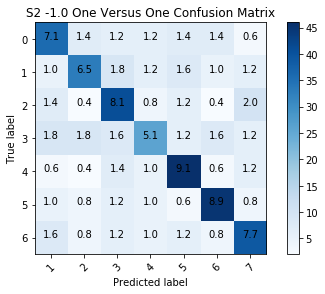

In [30]:
import itertools
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from IPython.core.display import display

target_names = ['flex', 'extend', 'sup', 'pro', 'close', 'hopen', 'rest']
report = classification_report(s2results['Actual'], s2results['Predicted'], target_names=target_names, output_dict=True) 
report_df = pd.DataFrame(report).transpose()
display(report_df) 

event_id = dict(flex = 1, extend = 2, sup = 3, pro = 4, close = 5, hopen = 6, rest = 7)
#revised_actual = map(event_id.get, s2results['Actual'].tolist())
#revised_predicted = map(event_id.get, s2results['Predicted'].tolist())
cm = confusion_matrix(s2results['Actual'], s2results['Predicted'])
#map_dict = {1:'flex', 2:'extend', 3:'sup', 4:'pro', 5:'close', 6:'hopen', 7:'rest'}
#revised_actual = s2results['Actual'].map(event_id)
#revised_predicted = s2results['Predicted'].map(event_id)

#cm = confusion_matrix(revised_actual, revised_predicted)

mov_vs_mov = s2results[s2results['Actual'] != 7]
#mov_vs_rest = s2results[s2results['Actual'] != 7]

import itertools
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm
cmap = matplotlib.cm.get_cmap('Blues')
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title('S2 -1.0 One Versus One Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(cm.shape[1])
plt.xticks(tick_marks, rotation=45)
ax = plt.gca()
ax.set_xticklabels((ax.get_xticks() +1).astype(str))
plt.yticks(tick_marks)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    percent = 100*(cm[i, j]/507) #72
    plt.text(j, i, format(percent, '.1f'),
            horizontalalignment="center",
            color="white" if percent > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label') 
plt.show()       

In [34]:
mov_vs_mov = s2results[s2results['Actual'] != 7]

In [36]:
100/7

14.285714285714286

In [24]:
cm[1, 1]

33